<a href="https://colab.research.google.com/github/PrithiviRajMK/ScalerProjects/blob/main/Loan_Tap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
### Apollo wants to know, 
*   which variables are significant in predicting the reason for hospitalization for different regions
*   how well some variables like viral load, smoking, severity level describe the hospitalization charges

#### Import Packages

In [ ]:
# Import required packages
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing Libs
import pandas as pd #data processing using DataFrames
import numpy as np #Numrical calculations
from sklearn.preprocessing import LabelEncoder, StandardScaler 
import re
import datetime
from dateutil.relativedelta import relativedelta
#Plotting Libs
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import plotly.express as px # plotting
#Statistics Libs
from scipy.stats import binom, poisson,expon # For Probability Distribution.
import plotly.figure_factory as ff # distplot 
from scipy.stats import ttest_ind, f_oneway, kruskal # numeric Vs catogerical
from scipy.stats import chi2_contingency
import scipy.stats as st# categorical Vs categorical
from datetime import datetime
from scipy.stats import pearsonr, spearmanr # numeric Vs numeric

from scipy.stats import kstest,levene,norm,shapiro # cdf
from statsmodels.graphics.gofplots import qqplot_2samples, qqplot

from statsmodels.distributions.empirical_distribution import ECDF
# Prec


#### Import & Load data

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921")

# Statistical Summary

### Meta-data of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Description of the dataframe

In [ ]:
df.describe().T

count          mean           std     min       25%  \
loan_amnt             396030.0  14113.888089   8357.441341  500.00   8000.00   
int_rate              396030.0     13.639400      4.472157    5.32     10.49   
installment           396030.0    431.849698    250.727790   16.08    250.33   
annual_inc            396030.0  74203.175798  61637.621158    0.00  45000.00   
dti                   396030.0     17.379514     18.019092    0.00     11.28   
open_acc              396030.0     11.311153      5.137649    0.00      8.00   
pub_rec               396030.0      0.178191      0.530671    0.00      0.00   
revol_bal             396030.0  15844.539853  20591.836109    0.00   6025.00   
revol_util            395754.0     53.791749     24.452193    0.00     35.80   
total_acc             396030.0     25.414744     11.886991    2.00     17.00   
mort_acc              358235.0      1.813991      2.147930    0.00      0.00   
pub_rec_bankruptcies  395495.0      0.121648      0.356174    0.00      0.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.30     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00       86.00  
revol_bal             11181.00  19620.00  1743266.00  
revol_util               54.80     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      3.00       34.00  
pub_rec_bankruptcies      0.00      0.00        8.00

In [ ]:
df.describe(include='all').T

count  unique                          top    freq  \
loan_amnt             396030.0     NaN                          NaN     NaN   
term                    396030       2                    36 months  302005   
int_rate              396030.0     NaN                          NaN     NaN   
installment           396030.0     NaN                          NaN     NaN   
grade                   396030       7                            B  116018   
sub_grade               396030      35                           B3   26655   
emp_title               373103  173105                      Teacher    4389   
emp_length              377729      11                    10+ years  126041   
home_ownership          396030       6                     MORTGAGE  198348   
annual_inc            396030.0     NaN                          NaN     NaN   
verification_status     396030       3                     Verified  139563   
issue_d                 396030     115                     Oct-2014   14846   
loan_status             396030       2                   Fully Paid  318357   
purpose                 396030      14           debt_consolidation  234507   
title                   394275   48817           Debt consolidation  152472   
dti                   396030.0     NaN                          NaN     NaN   
earliest_cr_line        396030     684                     Oct-2000    3017   
open_acc              396030.0     NaN                          NaN     NaN   
pub_rec               396030.0     NaN                          NaN     NaN   
revol_bal             396030.0     NaN                          NaN     NaN   
revol_util            395754.0     NaN                          NaN     NaN   
total_acc             396030.0     NaN                          NaN     NaN   
initial_list_status     396030       2                            f  238066   
application_type        396030       3                   INDIVIDUAL  395319   
mort_acc              358235.0     NaN                          NaN     NaN   
pub_rec_bankruptcies  395495.0     NaN                          NaN     NaN   
address                 396030  393700  USCGC Smith\r\nFPO AE 70466       8   

                              mean           std    min      25%      50%  \
loan_amnt             14113.888089   8357.441341  500.0   8000.0  12000.0   
term                           NaN           NaN    NaN      NaN      NaN   
int_rate                   13.6394      4.472157   5.32    10.49    13.33   
installment             431.849698     250.72779  16.08   250.33   375.43   
grade                          NaN           NaN    NaN      NaN      NaN   
sub_grade                      NaN           NaN    NaN      NaN      NaN   
emp_title                      NaN           NaN    NaN      NaN      NaN   
emp_length                     NaN           NaN    NaN      NaN      NaN   
home_ownership                 NaN           NaN    NaN      NaN      NaN   
annual_inc            74203.175798  61637.621158    0.0  45000.0  64000.0   
verification_status            NaN           NaN    NaN      NaN      NaN   
issue_d                        NaN           NaN    NaN      NaN      NaN   
loan_status                    NaN           NaN    NaN      NaN      NaN   
purpose                        NaN           NaN    NaN      NaN      NaN   
title                          NaN           NaN    NaN      NaN      NaN   
dti                      17.379514     18.019092    0.0    11.28    16.91   
earliest_cr_line               NaN           NaN    NaN      NaN      NaN   
open_acc                 11.311153      5.137649    0.0      8.0     10.0   
pub_rec                   0.178191      0.530671    0.0      0.0      0.0   
revol_bal             15844.539853  20591.836109    0.0   6025.0  11181.0   
revol_util               53.791749     24.452193    0.0     35.8     54.8   
total_acc                25.414744     11.886991    2.0     17.0     24.0   
initial_list_status            NaN       

In [ ]:
# only object type columns
df.describe(include='object').T

count  unique                          top    freq
term                 396030       2                    36 months  302005
grade                396030       7                            B  116018
sub_grade            396030      35                           B3   26655
emp_title            373103  173105                      Teacher    4389
emp_length           377729      11                    10+ years  126041
home_ownership       396030       6                     MORTGAGE  198348
verification_status  396030       3                     Verified  139563
issue_d              396030     115                     Oct-2014   14846
loan_status          396030       2                   Fully Paid  318357
purpose              396030      14           debt_consolidation  234507
title                394275   48817           Debt consolidation  152472
earliest_cr_line     396030     684                     Oct-2000    3017
initial_list_status  396030       2                            f  238066
application_type     396030       3                   INDIVIDUAL  395319
address              396030  393700  USCGC Smith\r\nFPO AE 70466       8

### Shape of the data

In [ ]:
### Data shape
print("Loan Top dataset has {} rows and {} columns.".format(df.shape[0], df.shape[1]))

Loan Top dataset has 396030 rows and 27 columns.


### Size & Count

In [ ]:
# total number of elements/records 
df.size

10692810

### Column Names

In [ ]:
# Columna names
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

* loan_amnt :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.*
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

### Column data typess

In [ ]:
### Data type of all attributes
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

# Data Pre-processing

### Check for Missing Values

In [ ]:
# Missing Values

print("Total missing values in Dataset " + str(df.isnull().sum().sum()))
null_values= pd.DataFrame({"Null Values" : df.isna().sum(),
                           "Percentage Null Value": (df.isna().sum()/(df.shape[0])*(100))})
null_values[null_values["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 81589


Null Values  Percentage Null Value
mort_acc                    37795               9.543469
emp_title                   22927               5.789208
emp_length                  18301               4.621115
title                        1755               0.443148
pub_rec_bankruptcies          535               0.135091
revol_util                    276               0.069692

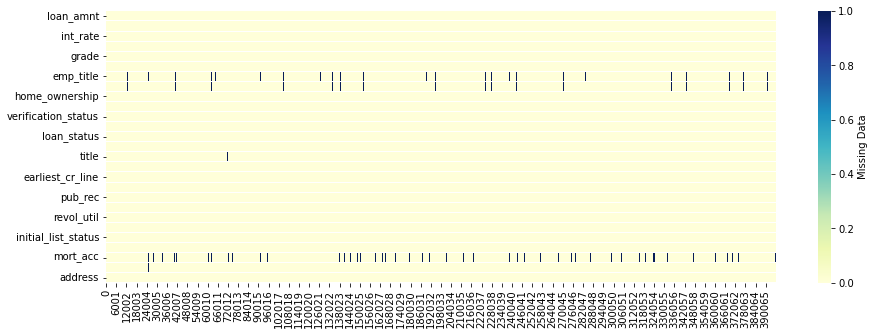

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [ ]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['emp_title'].fillna('unknown_Emp_title', inplace=True)

In [ ]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['emp_length'].fillna(method="ffill", inplace=True)

In [ ]:
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
df['mort_acc'].fillna(df['mort_acc'].median(), inplace=True)

In [ ]:
# Since the number of missing item is less we can remove row with null in title, pub_rec_bankruptcies, revol_util . 
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

0

#### **Observation**: *There is no missing value in the given dataset for any attribute*

### Check for duplicates

In [ ]:
# duplicates
df.duplicated().sum()

0

#### **Observation**: *There is no duplicate value in the given dataset*

In [ ]:

pd.set_option('display.max_columns', None)
df.head(4)


loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           RENT    117000.0        Not Verified   
1  Credit analyst     4 years       MORTGAGE     65000.0        Not Verified   
2     Statistician   < 1 year           RENT     43057.0     Source Verified   
3  Client Advocate    6 years           RENT     54000.0        Not Verified   

    issue_d loan_status             purpose                    title    dti  \
0  Jan-2015  Fully Paid            vacation                 Vacation  26.24   
1  Jan-2015  Fully Paid  debt_consolidation       Debt consolidation  22.05   
2  Jan-2015  Fully Paid         credit_card  Credit card refinancing  12.79   
3  Nov-2014  Fully Paid         credit_card  Credit card refinancing   2.60   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   
3         Sep-2006       6.0      0.0     5472.0        21.5       13.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   
3                   f       INDIVIDUAL       0.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813

### Dataset Copy

In [ ]:
# Take a working copy of the given dataset
work_df = df.copy()

In [ ]:
work_df['issue_d_month'], work_df['issue_d_year'] = work_df['issue_d'].str.split('-', 1).str
work_df['earliest_cr_line_month'], work_df['earliest_cr_line_year'] = work_df['earliest_cr_line'].str.split('-', 1).str

In [ ]:
work_df[ 'city_state_zip'] = work_df['address'].astype(str).str[-8:]


In [ ]:

work_df['pin'] = work_df['city_state_zip'].str.extract(r'\b(\d{5})\b', expand=False)
work_df['city_code'] = work_df['city_state_zip'].str.extract(r'\b(\w{2})\b', expand=False)
work_df.head(3)

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   

         emp_title emp_length home_ownership  annual_inc verification_status  \
0        Marketing  10+ years           RENT    117000.0        Not Verified   
1  Credit analyst     4 years       MORTGAGE     65000.0        Not Verified   
2     Statistician   < 1 year           RENT     43057.0     Source Verified   

    issue_d loan_status             purpose                    title    dti  \
0  Jan-2015  Fully Paid            vacation                 Vacation  26.24   
1  Jan-2015  Fully Paid  debt_consolidation       Debt consolidation  22.05   
2  Jan-2015  Fully Paid         credit_card  Credit card refinancing  12.79   

  earliest_cr_line  open_acc  pub_rec  revol_bal  revol_util  total_acc  \
0         Jun-1990      16.0      0.0    36369.0        41.8       25.0   
1         Jul-2004      17.0      0.0    20131.0        53.3       27.0   
2         Aug-2007      13.0      0.0    11987.0        92.2       26.0   

  initial_list_status application_type  mort_acc  pub_rec_bankruptcies  \
0                   w       INDIVIDUAL       0.0                   0.0   
1                   f       INDIVIDUAL       3.0                   0.0   
2                   f       INDIVIDUAL       0.0                   0.0   

                                             address issue_d_month  \
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690           Jan   
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113           Jan   
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113           Jan   

  issue_d_year earliest_cr_line_month earliest_cr_line_year city_state_zip  \
0         2015                    Jun                  1990       OK 22690   
1         2015                    Jul                  2004       SD 05113   
2         2015                    Aug                  2007       WV 05113   

     pin city_code  
0  22690        OK  
1  05113        SD  
2  05113        WV

In [ ]:
#Simple Feature Engineering steps:
#Creation of Flags    
pub_rec_fea = lambda value : 0 if(value == 0) else 1
mort_acc_fea= lambda value : 0 if(value == 0) else (1 if (value>=1) else value)
pub_rec_bankruptcies_fea= lambda value : 0 if(value == 0) else (1 if (value>=1) else value)

work_df['pub_rec'] = work_df.pub_rec.apply(pub_rec_fea)
 
work_df['mort_acc'] = work_df.mort_acc.apply(mort_acc_fea)
     
work_df['pub_rec_bankruptcies'] = work_df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies_fea)

In [ ]:

# Convert the emp_length to a numerical column
# Before converting the datatype, let's make <1 yrs as 0 years and 10+ yrs to 10 years
work_df['emp_length'] = work_df['emp_length'].replace(['< 1 year'], '0 year')
work_df['emp_length'] = work_df['emp_length'].replace(['10+ years'], '10 years')
work_df[['emp_len', 'emp_years']] = work_df['emp_length'].str.split(' ', expand=True)

work_df['emp_len'] = work_df['emp_len'].astype(int)

In [ ]:

work_df['home_ownership'].replace({"NONE":"OTHER", "ANY": "OTHER"}, inplace=True)

In [ ]:

term_values = {' 36 months': 36, ' 60 months': 60}
work_df['term'] = work_df['term'].map(term_values)

In [ ]:
work_df['issue_d'] = pd.to_datetime(work_df['issue_d'])
work_df['earliest_cr_line'] = pd.to_datetime(work_df['earliest_cr_line'])

In [ ]:
now = datetime.now()

work_df['cur_date'] = pd.Series([now.date() for x in range(len(work_df.index))])
work_df['cur_date'] = pd.to_datetime(work_df['cur_date'])


In [ ]:
work_df['tenure'] = (12 * (work_df['cur_date'].dt.year - work_df['issue_d'].dt.year) + (work_df['cur_date'].dt.month - work_df['issue_d'].dt.month))
work_df['credit_line_Tenure'] = (12 * (work_df['cur_date'].dt.year - work_df['earliest_cr_line'].dt.year) + (work_df['cur_date'].dt.month - work_df['earliest_cr_line'].dt.month))


In [ ]:
# Drop the address column as it may not have much significant for our analysis
work_df.drop(['address','earliest_cr_line','issue_d','emp_length', 'emp_years','city_state_zip','cur_date'], axis='columns', inplace=True)

In [ ]:
work_df.head(3)

loan_amnt  term  int_rate  installment grade sub_grade        emp_title  \
0    10000.0    36     11.44       329.48     B        B4        Marketing   
1     8000.0    36     11.99       265.68     B        B5  Credit analyst    
2    15600.0    36     10.49       506.97     B        B3     Statistician   

  home_ownership  annual_inc verification_status loan_status  \
0           RENT    117000.0        Not Verified  Fully Paid   
1       MORTGAGE     65000.0        Not Verified  Fully Paid   
2           RENT     43057.0     Source Verified  Fully Paid   

              purpose                    title    dti  open_acc  pub_rec  \
0            vacation                 Vacation  26.24      16.0        0   
1  debt_consolidation       Debt consolidation  22.05      17.0        0   
2         credit_card  Credit card refinancing  12.79      13.0        0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies issue_d_month issue_d_year  \
0         0                     0           Jan         2015   
1         1                     0           Jan         2015   
2         0                     0           Jan         2015   

  earliest_cr_line_month earliest_cr_line_year    pin city_code  emp_len  \
0                    Jun                  1990  22690        OK       10   
1                    Jul                  2004  05113        SD        4   
2                    Aug                  2007  05113        WV        0   

   tenure  credit_line_Tenure  
0    97.0               392.0  
1    97.0               223.0  
2    97.0               186.0

In [ ]:
work_df.isnull().sum().sum()

5090

In [ ]:

# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
work_df['mort_acc'].fillna(work_df['mort_acc'].median(), inplace=True)
# Imputing missing values of 'emp_title' with 'unknown_Emp_title'
work_df['credit_line_Tenure'].fillna(work_df['credit_line_Tenure'].median(), inplace=True)

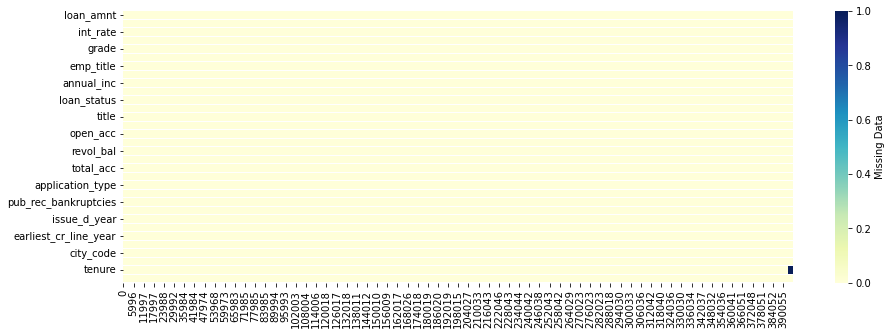

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(work_df.isna().transpose(),
            cmap="YlGnBu",
           cbar_kws={'label': 'Missing Data'})

In [ ]:
print("Total missing values in Dataset " + str(work_df.isnull().sum().sum()))
null_value= pd.DataFrame({"Null Values" : work_df.isna().sum(),
                           "Percentage Null Value": (work_df.isna().sum()/(work_df.shape[0])*(100))})
null_value[null_value["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 2545


Null Values  Percentage Null Value
tenure         2545               0.646817

In [ ]:
# Since the number of missing item is less we can remove row with null in title, pub_rec_bankruptcies, revol_util . 
work_df.dropna(inplace=True)

In [ ]:
print("Total missing values in Dataset " + str(work_df.isnull().sum().sum()))
null_value= pd.DataFrame({"Null Values" : work_df.isna().sum(),
                           "Percentage Null Value": (work_df.isna().sum()/(work_df.shape[0])*(100))})
null_value[null_value["Null Values"]!=0].sort_values(by=["Null Values"],ascending=False)


Total missing values in Dataset 0


Empty DataFrame
Columns: [Null Values, Percentage Null Value]
Index: []

In [ ]:
num_features = [y for y in work_df.columns if work_df[y].dtype not in ('object','datetime64')]
num_features
#[ 'term', 'sub_grade',
 #      'loan_status',  
  #     'emp_duration', 'credit_line_age', 'loan_age']

['loan_amnt',
 'term',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'emp_len',
 'tenure',
 'credit_line_Tenure']

In [ ]:
# categorical_features=list(work_df.select_dtypes('object').columns)
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'issue_d_month',
 'issue_d_year',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'pin',
 'city_code']

In [ ]:

def percentage_outliers(df, column_name):
    data = df[column_name]
    
    # calculate the upper and lower bounds for outliers
    Q1, Q3 = np.percentile(data, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # identify outliers
    outliers = df[(data < lower_bound) | (data > upper_bound)]
    
    # calculate the percentage of outliers
    percentage = (len(outliers) / len(df)) * 100
    outlier_count=len(outliers)
    
    return percentage, outlier_count

In [ ]:
def outlier_summary(num_features):
  out_per=pd.DataFrame({'Column': [],	'percentage': [], 'count':[]})
  for cols in num_features:
    #print(cols)
    #print(cols.type)
    per, out_count=percentage_outliers(work_df, cols)
    #print(per)
    new_row={'Column':cols, 'percentage':per,'count':out_count}
    out_per = out_per.append(new_row, ignore_index=True)
  return out_per
   
out_sum=outlier_summary(num_features)
out_sum

Column  percentage    count
0              loan_amnt    0.046045    180.0
1                   term   23.749360  92841.0
2               int_rate    0.943671   3689.0
3            installment    2.828200  11056.0
4             annual_inc    4.215440  16479.0
5                    dti    0.064719    253.0
6               open_acc    2.595928  10148.0
7                pub_rec   14.584314  57013.0
8              revol_bal    5.360688  20956.0
9             revol_util    0.002814     11.0
10             total_acc    2.146475   8391.0
11              mort_acc    0.000000      0.0
12  pub_rec_bankruptcies   11.402589  44575.0
13               emp_len    0.000000      0.0
14                tenure    2.385399   9325.0
15    credit_line_Tenure    3.089891  12079.0

In [ ]:
def replace_outliers_iqr(df, column, multiplier=1.5):
    Q1, Q3 = df[column].quantile([0.05, 0.95])
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    return df

In [ ]:
#for i in num_features:
#  iqr_method=replace_outliers_iqr(work_df, i)
#iqr_method.describe().T

In [ ]:
work_df[num_features].describe().T

count          mean           std     min       25%  \
loan_amnt             390920.0  14116.828059   8352.135530  500.00   8000.00   
term                  390920.0     41.699847     10.213145   36.00     36.00   
int_rate              390920.0     13.638655      4.468638    5.32     10.49   
installment           390920.0    431.940179    250.568042   16.08    250.33   
annual_inc            390920.0  74214.140381  61716.003025    0.00  45000.00   
dti                   390920.0     17.382371     18.108387    0.00     11.30   
open_acc              390920.0     11.317157      5.132145    1.00      8.00   
pub_rec               390920.0      0.145843      0.352949    0.00      0.00   
revol_bal             390920.0  15847.523995  20498.744410    0.00   6043.00   
revol_util            390920.0     53.832171     24.432016    0.00     35.90   
total_acc             390920.0     25.424706     11.880809    2.00     17.00   
mort_acc              390920.0      0.646690      0.477999    0.00      0.00   
pub_rec_bankruptcies  390920.0      0.114026      0.317843    0.00      0.00   
emp_len               390920.0      5.940681      3.644641    0.00      3.00   
tenure                390920.0    107.907902     17.181107   74.00     95.00   
credit_line_Tenure    390920.0    296.953213     86.356675  112.00    238.00   

                           50%       75%         max  
loan_amnt             12000.00  20000.00    40000.00  
term                     36.00     36.00       60.00  
int_rate                 13.33     16.49       30.99  
installment             375.43    567.49     1533.81  
annual_inc            64000.00  90000.00  8706582.00  
dti                      16.91     22.98     9999.00  
open_acc                 10.00     14.00       90.00  
pub_rec                   0.00      0.00        1.00  
revol_bal             11195.00  19631.00  1743266.00  
revol_util               54.90     72.90      892.30  
total_acc                24.00     32.00      151.00  
mort_acc                  1.00      1.00        1.00  
pub_rec_bankruptcies      0.00      0.00        1.00  
emp_len                   6.00     10.00       10.00  
tenure                  106.00    117.00      186.00  
credit_line_Tenure      281.00    340.00      949.00

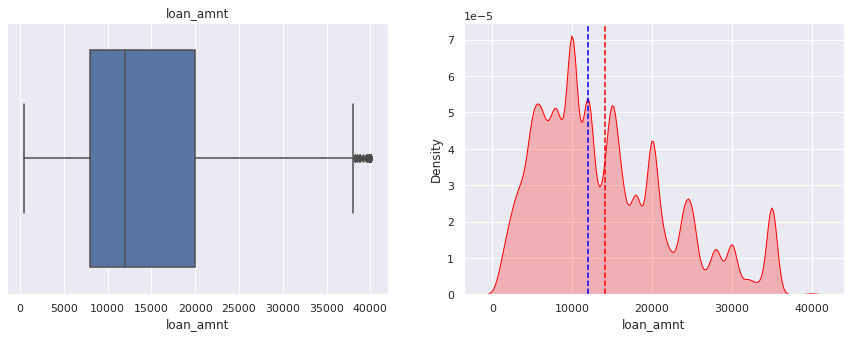

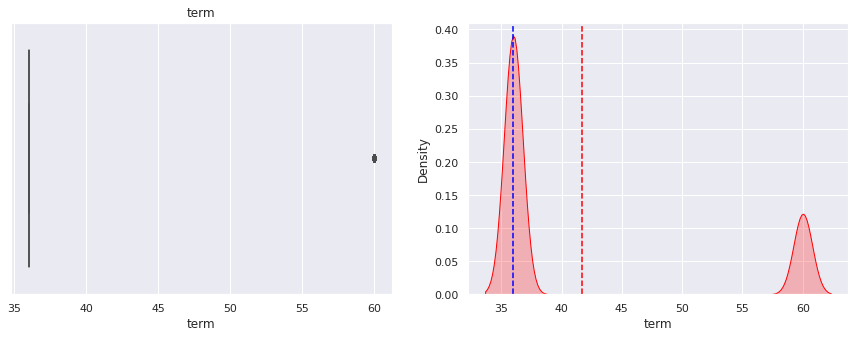

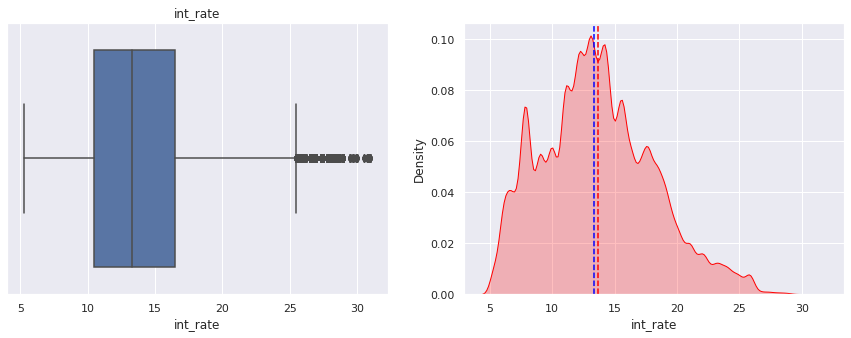

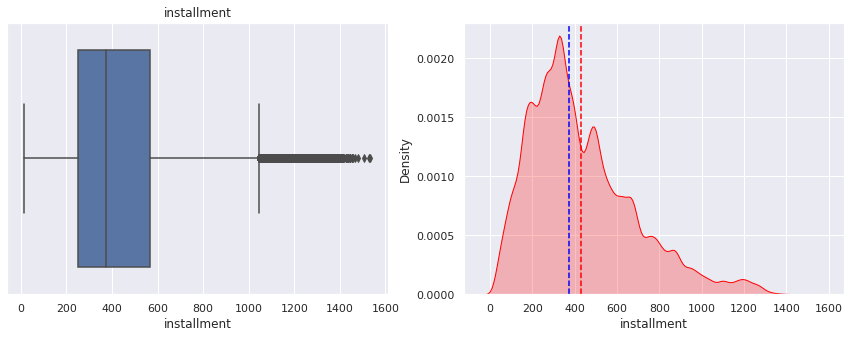

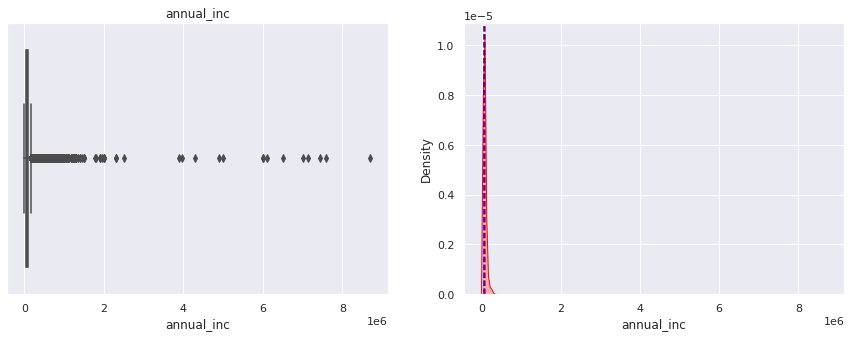

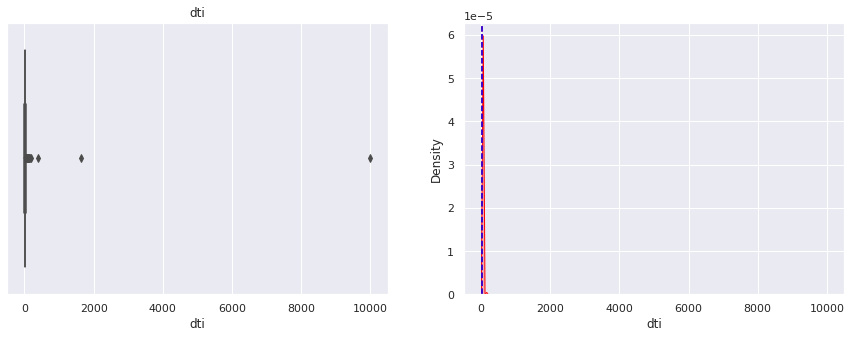

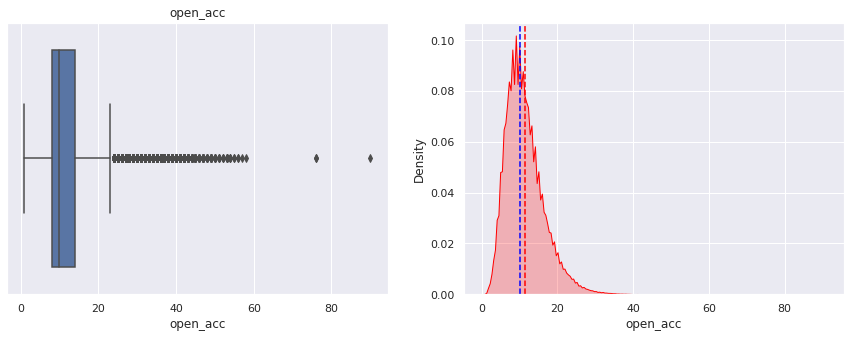

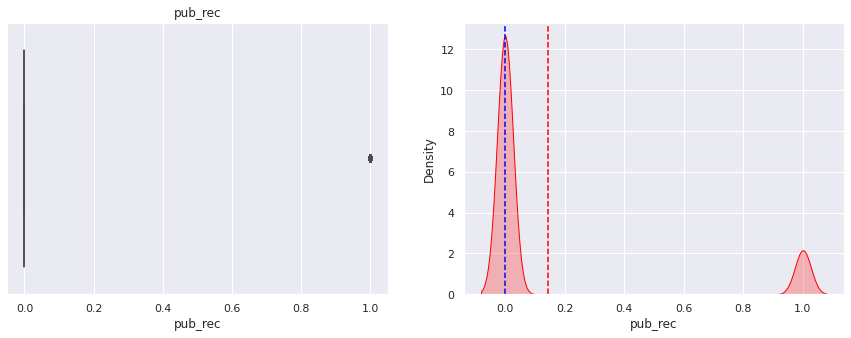

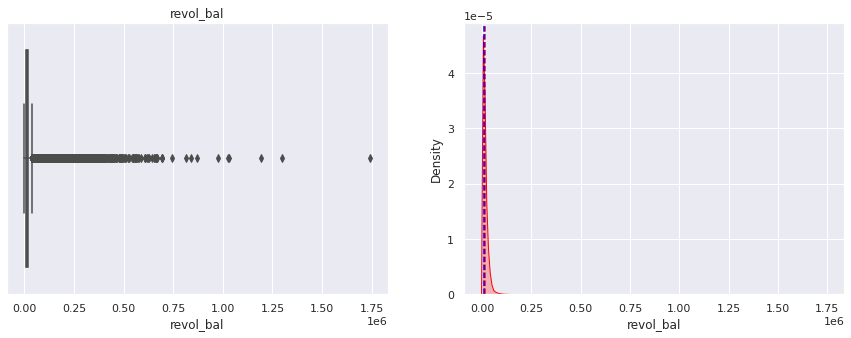

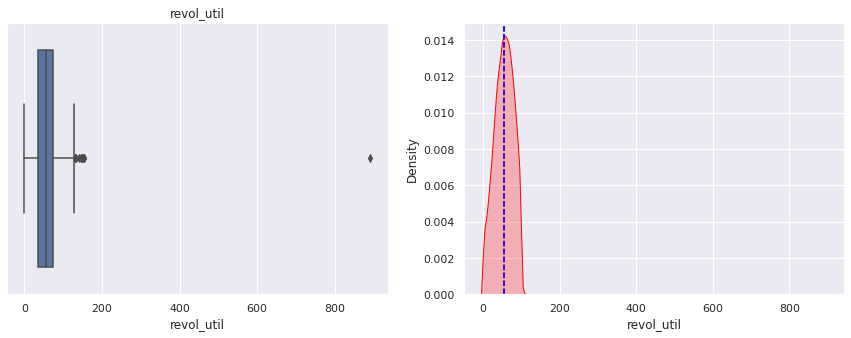

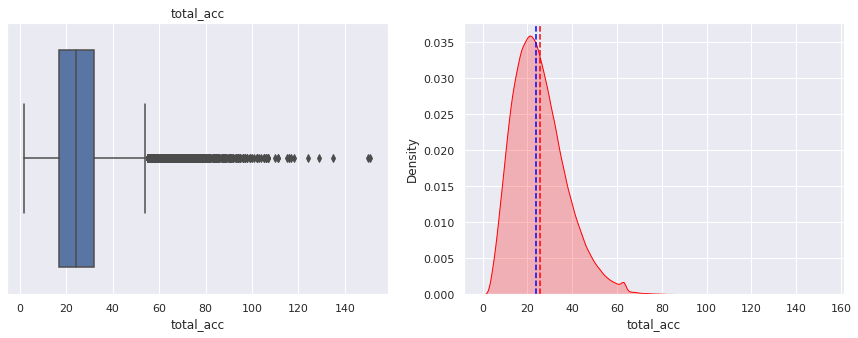

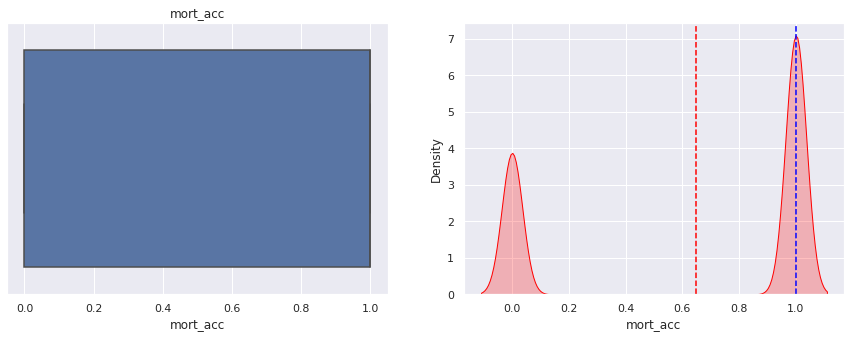

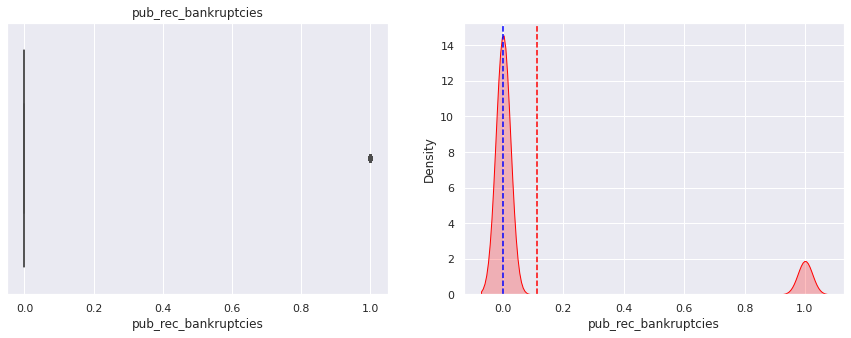

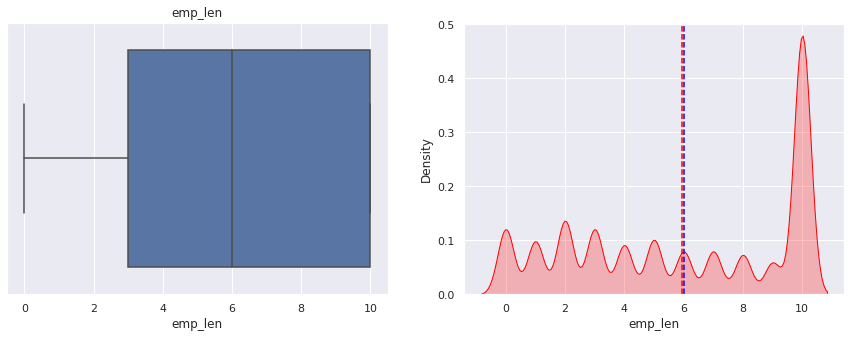

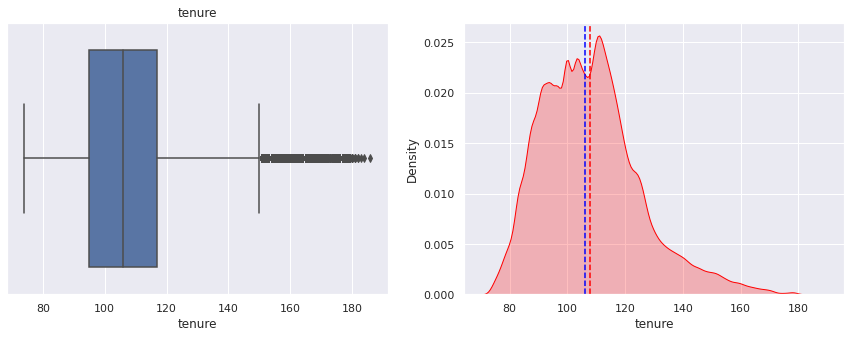

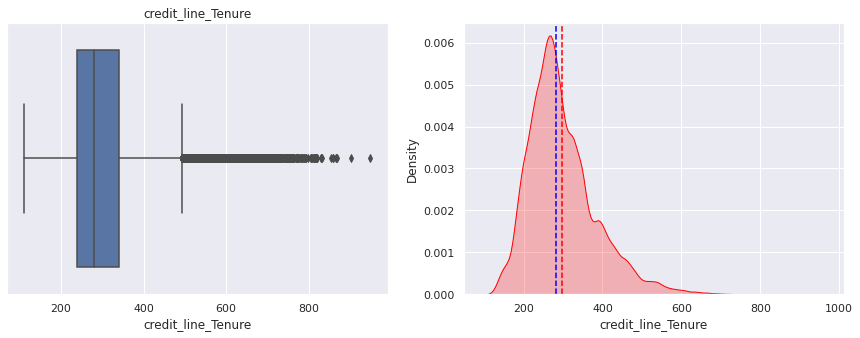

['loan_amnt',
 'term',
 'installment',
 'annual_inc',
 'revol_bal',
 'credit_line_age',
 'loan_age']

In [ ]:
sns.set_theme(style='darkgrid')

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=work_df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=work_df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=work_df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()
['loan_amnt', 'term', 'installment', 'annual_inc', 'revol_bal', 'credit_line_age', 'loan_age']

In [ ]:
for i, j in enumerate(['loan_amnt',
 'installment','total_acc','dti',
 'annual_inc',
 'revol_bal','tenure','credit_line_Tenure']):
  q1 = work_df[j].quantile(0.25)
  q3 = work_df[j].quantile(0.75)
  iqr = q3 - q1
  work_df = work_df[(work_df[j] >= q1-1.5*iqr) & (work_df[j] <= q3+1.5*iqr)]

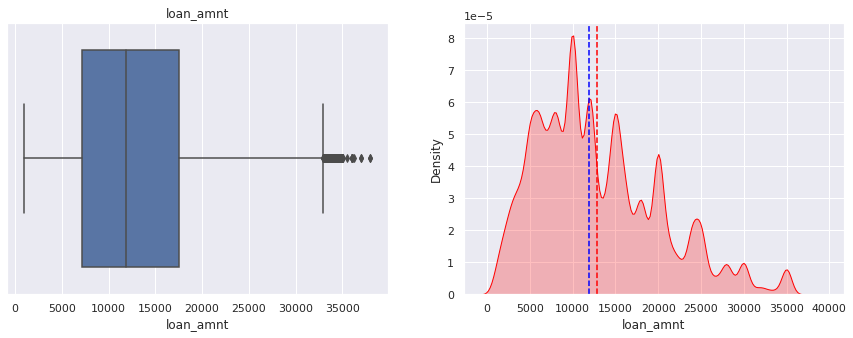

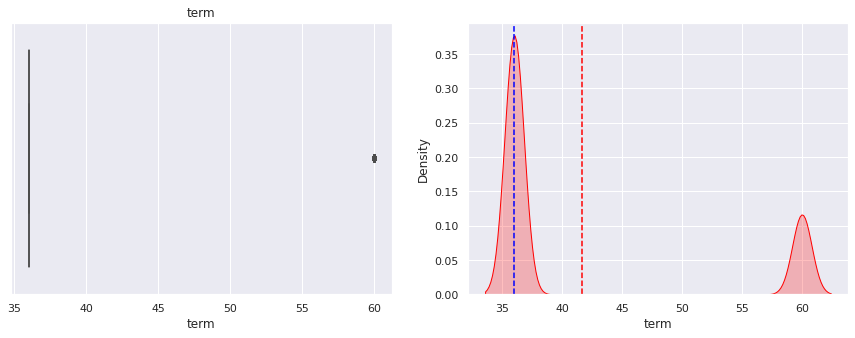

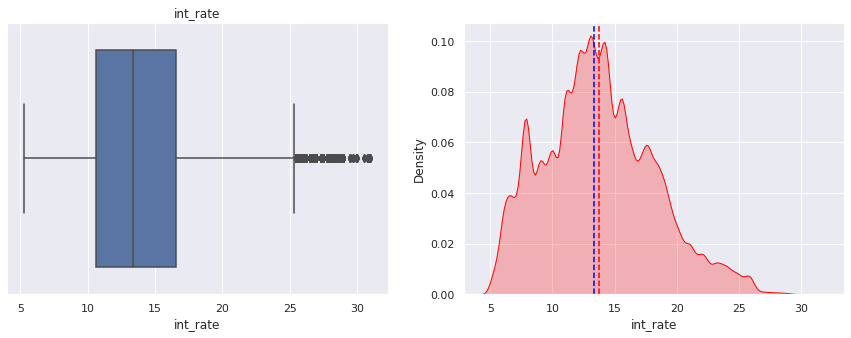

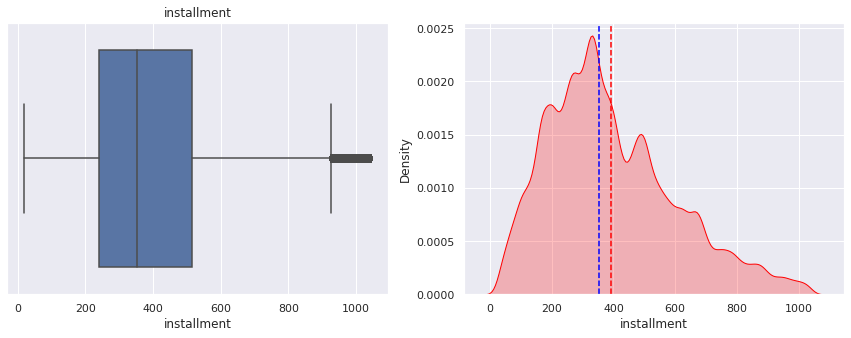

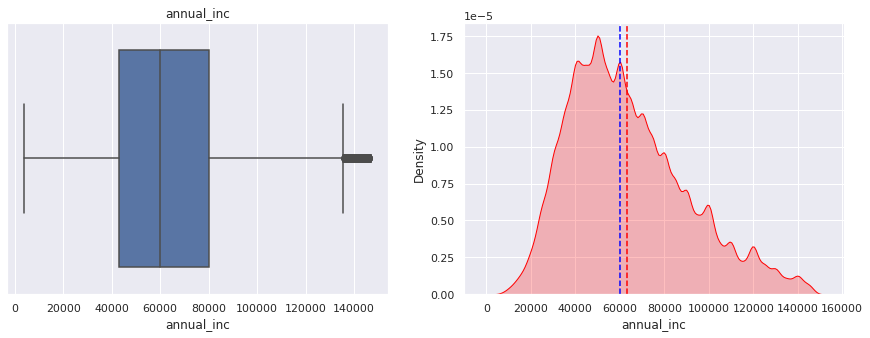

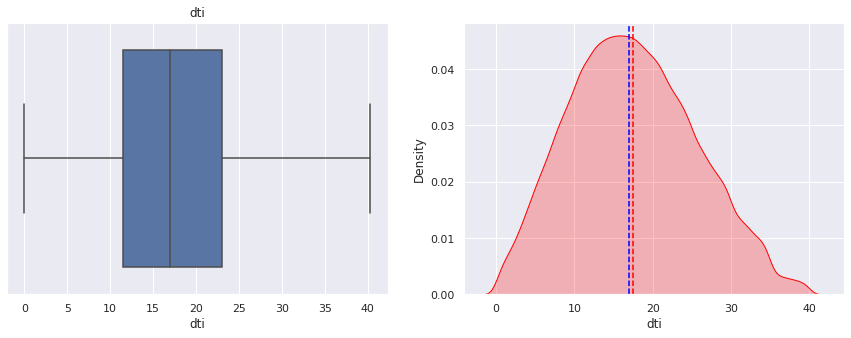

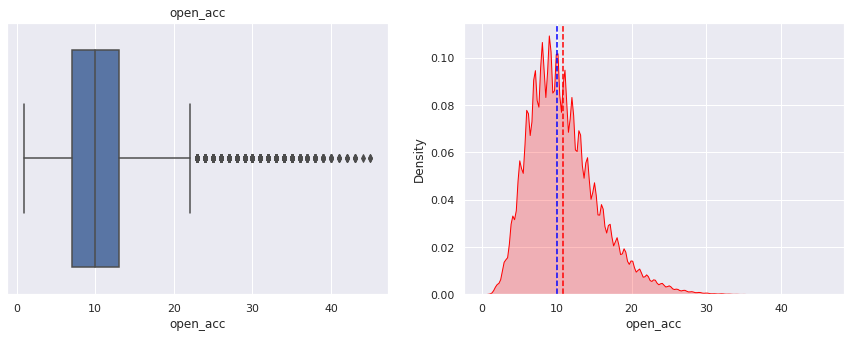

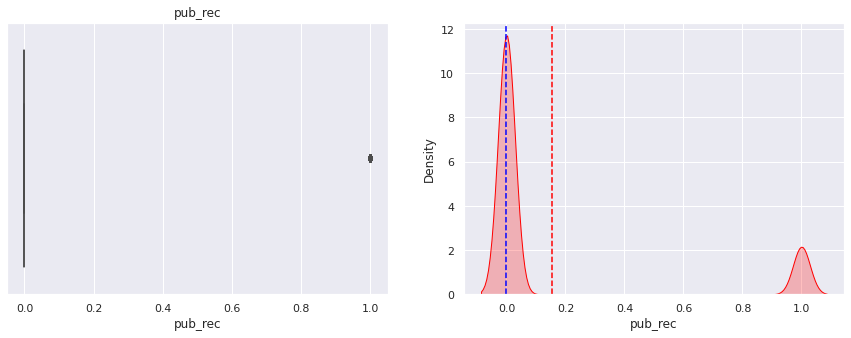

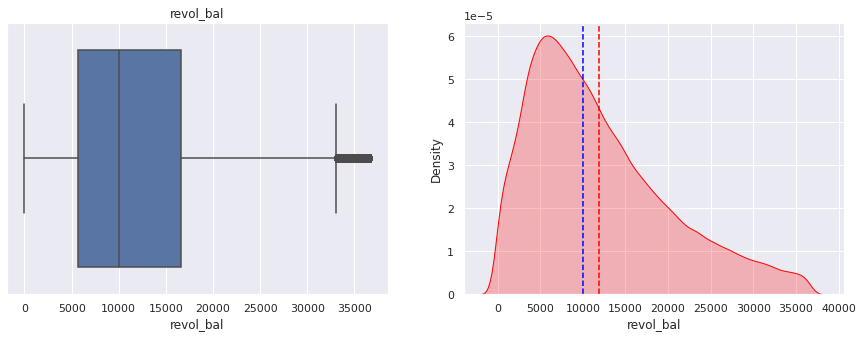

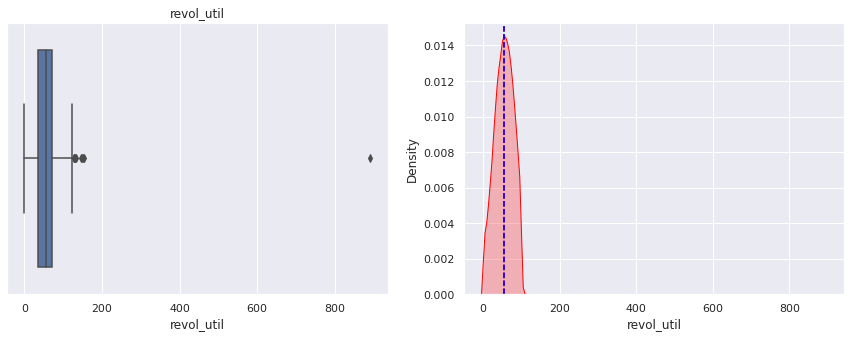

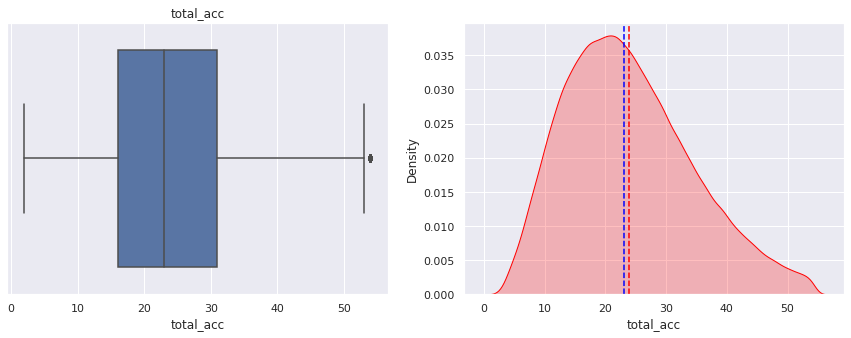

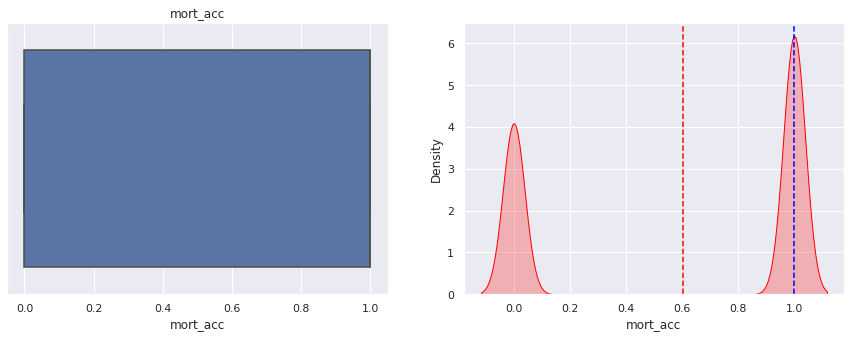

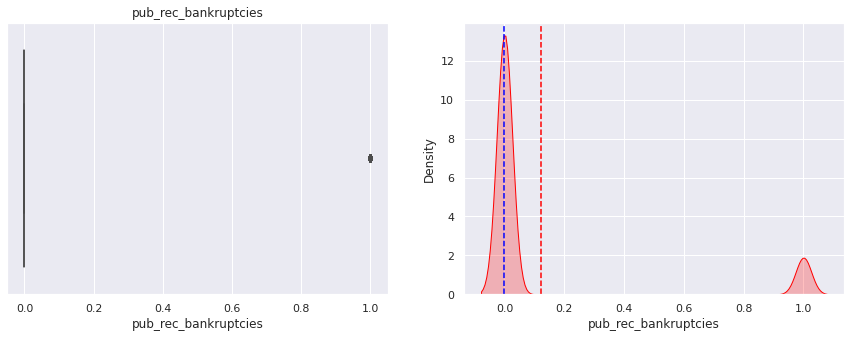

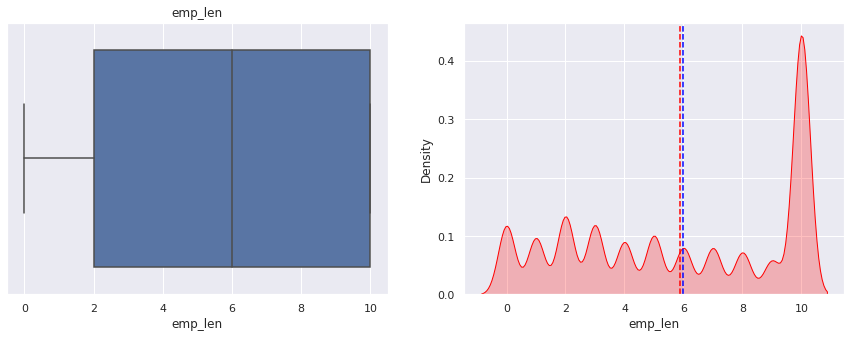

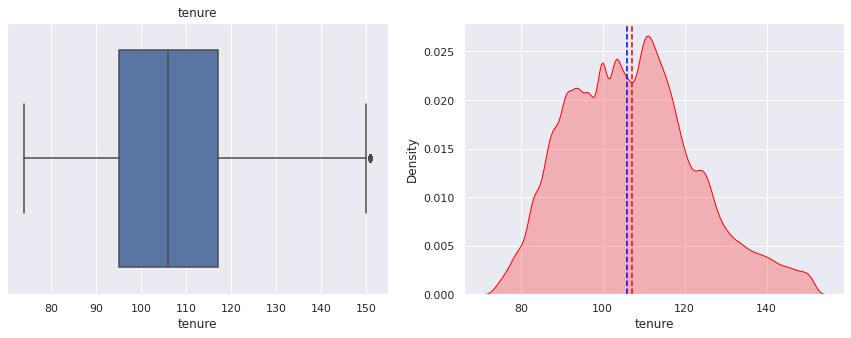

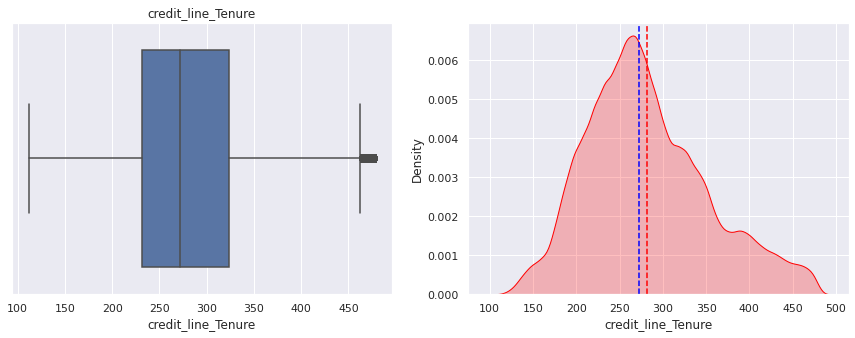

In [ ]:
sns.set_theme(style='darkgrid')

for col in num_features:
  plt.figure(figsize=(15,5))
  plt.subplot(121)
  p = sns.boxplot(data=work_df,x=col)
  p.set(title=f'{col}')
  
  plt.subplot(122)
  sns.kdeplot(x=work_df[col],color='red',shade=True)
  #sns.distplot(x=work_df[col],hist=True, kde=True)
  plt.axvline(x=work_df[col].mean(),color='red',ls='--',lw=1.5)
  
  plt.axvline(x=work_df[col].median(),color='blue',ls='--',lw=1.5)
  
  plt.show()

In [ ]:
work_df[num_features].describe().T

count          mean           std      min       25%  \
loan_amnt             318281.0  12869.636029   7250.700147  1000.00   7200.00   
term                  318281.0     41.659150     10.187932    36.00     36.00   
int_rate              318281.0     13.720635      4.438413     5.32     10.65   
installment           318281.0    392.670862    207.116714    20.22    240.15   
annual_inc            318281.0  63447.207431  26854.826898  4000.00  43000.00   
dti                   318281.0     17.443154      8.033812     0.00     11.45   
open_acc              318281.0     10.844147      4.681879     1.00      7.00   
pub_rec               318281.0      0.155165      0.362062     0.00      0.00   
revol_bal             318281.0  11915.081987   8177.435990     0.00   5630.00   
revol_util            318281.0     53.417820     24.134767     0.00     35.70   
total_acc             318281.0     23.898646     10.467854     2.00     16.00   
mort_acc              318281.0      0.601855      0.489516     0.00      0.00   
pub_rec_bankruptcies  318281.0      0.123777      0.329328     0.00      0.00   
emp_len               318281.0      5.869248      3.628266     0.00      2.00   
tenure                318281.0    107.142773     15.507183    74.00     95.00   
credit_line_Tenure    318281.0    281.411812     70.490015   112.00    232.00   

                           50%       75%        max  
loan_amnt             11850.00  17500.00   38000.00  
term                     36.00     36.00      60.00  
int_rate                 13.35     16.55      30.99  
installment             353.01    514.86    1042.30  
annual_inc            60000.00  80000.00  146734.00  
dti                      17.01     23.04      40.33  
open_acc                 10.00     13.00      45.00  
pub_rec                   0.00      0.00       1.00  
revol_bal             10075.00  16589.00   36688.00  
revol_util               54.20     72.00     892.30  
total_acc                23.00     31.00      54.00  
mort_acc                  1.00      1.00       1.00  
pub_rec_bankruptcies      0.00      0.00       1.00  
emp_len                   6.00     10.00      10.00  
tenure                  106.00    117.00     151.00  
credit_line_Tenure      272.00    324.00     478.00

### Data categories

# Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

#### Unique value counts of all attributes

#### Value Counts

In [ ]:
for col in work_df.columns:
  print(f"Loan Status vs {col} \n")
  print(work_df.groupby(by='loan_status')[col].describe().round(1), '\n')
  # Group the data by the values in the 'A' column
  # Create a pie chart from the grouped data
  #df.groupby('loan_status')[col].sum()

  # Show the plot
  
     

Loan Status vs loan_amnt 

                count     mean     std     min     25%      50%      75%  \
loan_status                                                                
Charged Off   64078.0  13975.6  7538.8  1000.0  8000.0  12300.0  19075.0   
Fully Paid   254203.0  12590.9  7149.3  1000.0  7000.0  11200.0  16900.0   

                 max  
loan_status           
Charged Off  35000.0  
Fully Paid   38000.0   

Loan Status vs term 

                count  mean   std   min   25%   50%   75%   max
loan_status                                                    
Charged Off   64078.0  45.3  11.7  36.0  36.0  36.0  60.0  60.0
Fully Paid   254203.0  40.7   9.6  36.0  36.0  36.0  36.0  60.0 

Loan Status vs int_rate 

                count  mean  std  min   25%   50%   75%   max
loan_status                                                  
Charged Off   64078.0  15.9  4.3  5.3  13.0  15.6  18.6  31.0
Fully Paid   254203.0  13.2  4.3  5.3  10.0  13.0  15.8  31.0 

Loan Status vs ins

In [ ]:

work_df.nunique()

loan_amnt                   1341
term                           2
int_rate                     404
installment                48673
grade                          7
sub_grade                     35
emp_title                 144616
home_ownership                 4
annual_inc                 21956
verification_status            3
loan_status                    2
purpose                       14
title                      37906
dti                         4007
open_acc                      45
pub_rec                        2
revol_bal                  35317
revol_util                  1184
total_acc                     53
initial_list_status            2
application_type               3
mort_acc                       2
pub_rec_bankruptcies           2
issue_d_month                 12
issue_d_year                   7
earliest_cr_line_month        12
earliest_cr_line_year         31
pin                           10
city_code                     54
emp_len                       11
tenure    

In [ ]:
# Number of unique records for each columns
cat_cols=[]
i=0
for col in work_df.columns:
  if len(work_df[col].unique())<=50:
    print(col,len(work_df[col].unique()))
    cat_cols.append(col)
    i=i+1
print(i)
print(cat_cols)

term 2
grade 7
sub_grade 35
home_ownership 4
verification_status 3
loan_status 2
purpose 14
open_acc 45
pub_rec 2
initial_list_status 2
application_type 3
mort_acc 2
pub_rec_bankruptcies 2
issue_d_month 12
issue_d_year 7
earliest_cr_line_month 12
earliest_cr_line_year 31
pin 10
emp_len 11
19
['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'open_acc', 'pub_rec', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'issue_d_month', 'issue_d_year', 'earliest_cr_line_month', 'earliest_cr_line_year', 'pin', 'emp_len']


In [ ]:
for col in cat_cols:
  print(f"{col} --> {work_df[col].dtype}")

term --> int64
grade --> object
sub_grade --> object
home_ownership --> object
verification_status --> object
loan_status --> object
purpose --> object
open_acc --> float64
pub_rec --> int64
initial_list_status --> object
application_type --> object
mort_acc --> int64
pub_rec_bankruptcies --> int64
issue_d_month --> object
issue_d_year --> object
earliest_cr_line_month --> object
earliest_cr_line_year --> object
pin --> object
emp_len --> int64


### Graphical Analysis

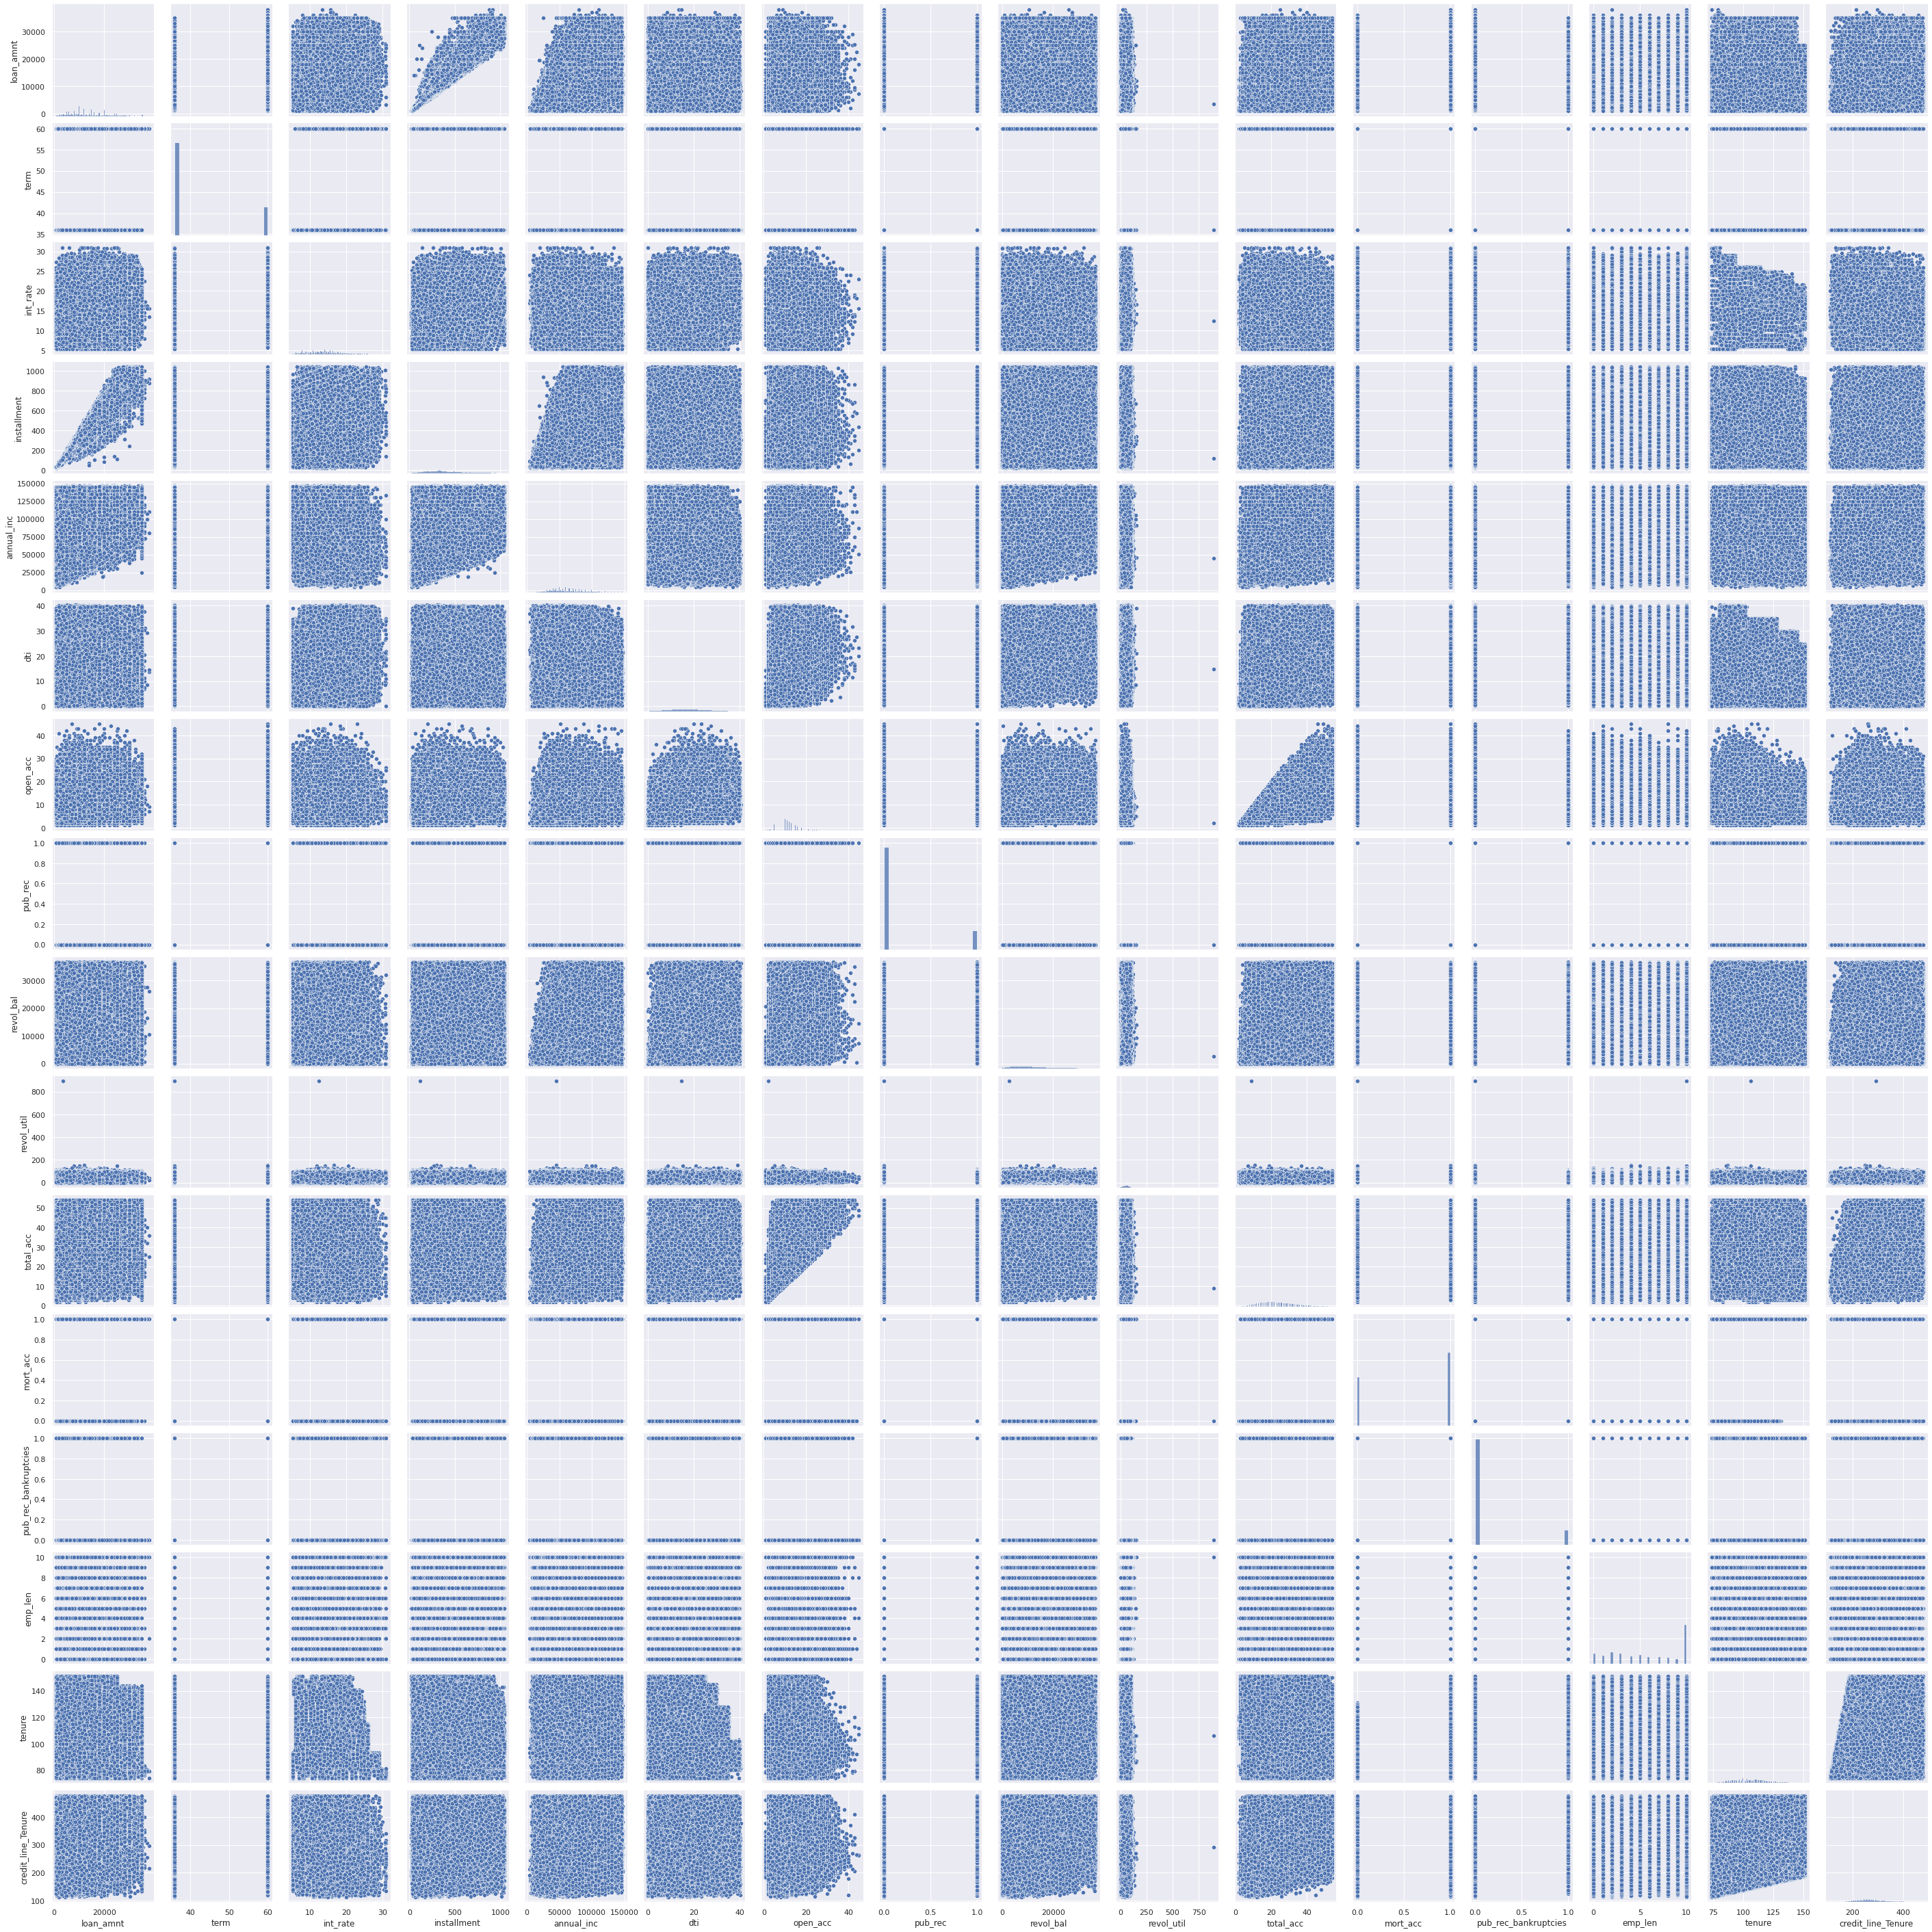

In [ ]:
sns.pairplot(work_df)

#### Univariate Analysis

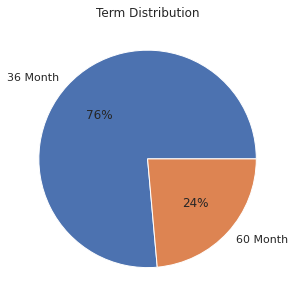

In [ ]:
plt.figure(figsize=(15,5))
plt.pie(work_df['term'].value_counts(),labels=['36 Month','60 Month'], autopct='%.0f%%')
plt.title('Term Distribution')
plt.show()

#### **Observation**: *Gender distribution amongst patients is almost same*

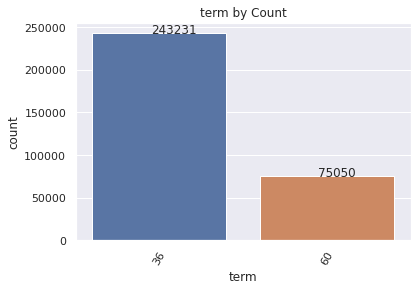

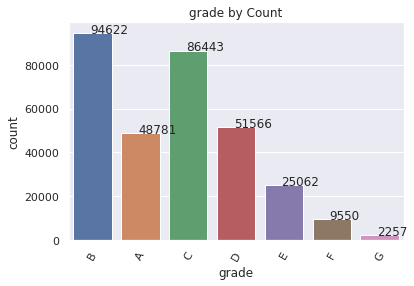

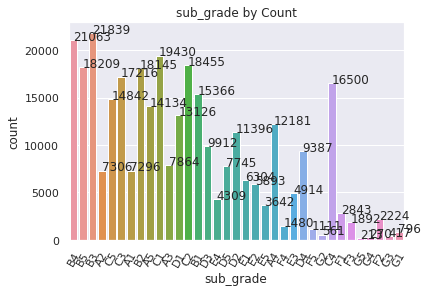

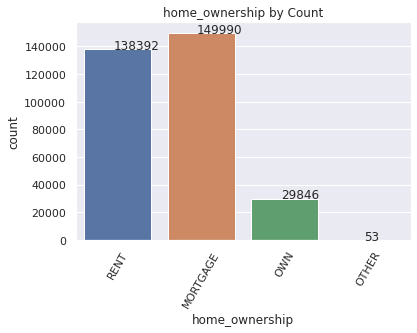

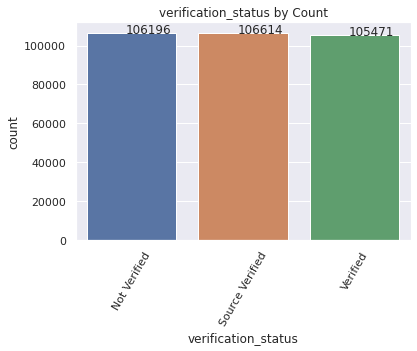

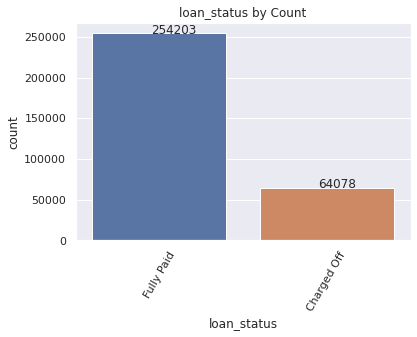

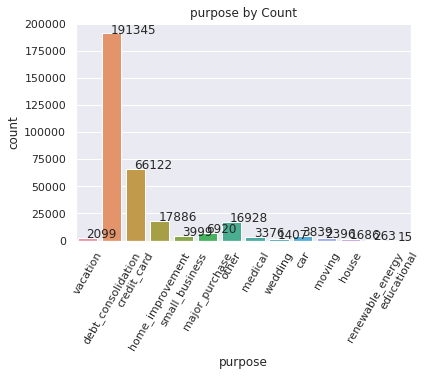

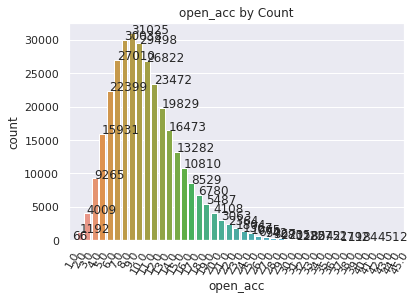

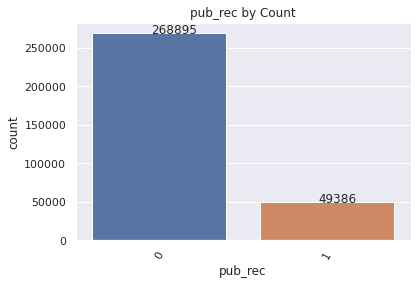

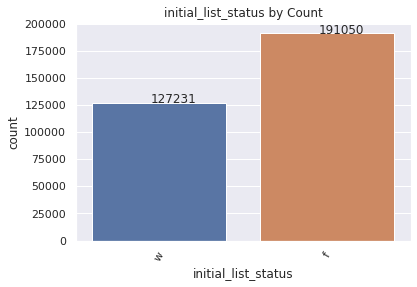

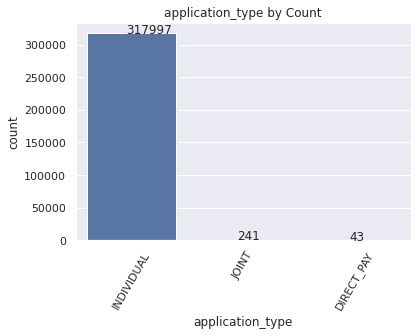

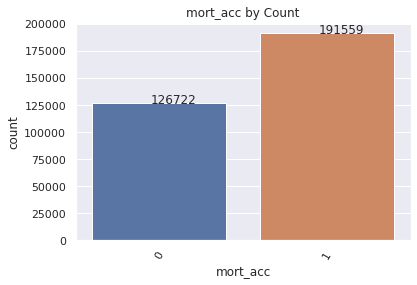

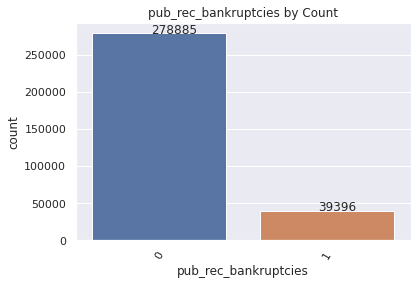

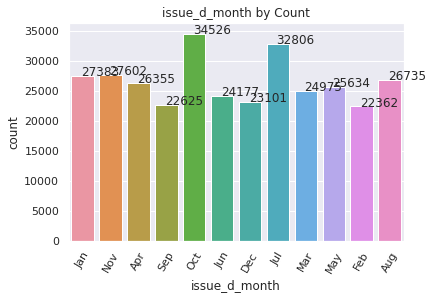

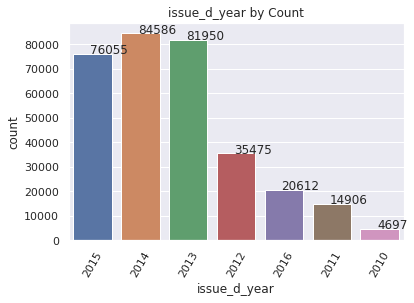

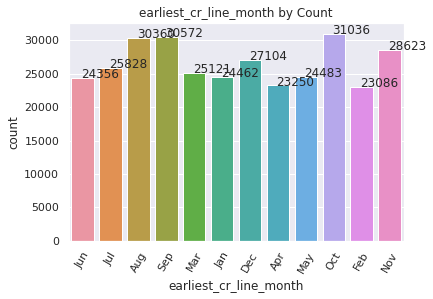

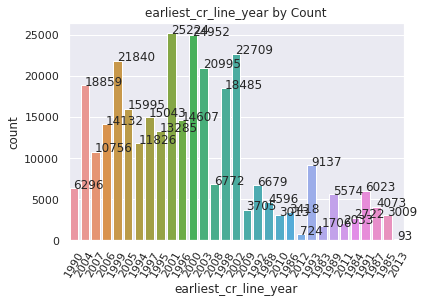

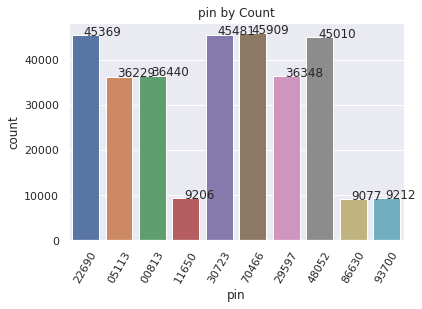

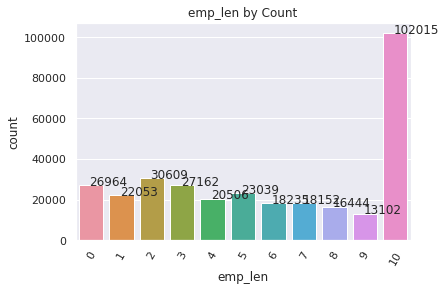

In [ ]:
# Count plot of attributes

for col in cat_cols:
  #plt.figure(figsize=(15,5))
  ax = sns.countplot(data=work_df, x=col)
  plt.title(f"{col} by Count")
  for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=60)
  plt.show()
  print()


#### **Observation**: 
*   *Age 18 & 19 have more patients and the rest of the ages have equal distribution*
*   *Interestingly Non-Smoker patients count is more than the Smokers count*
*   *Southeast region has more patients and the rest of the regions have equal distribution*
*   *Good to see less number of patients with 'Severity Level' high*

#### **Observation**: *The above charts indicate, we have outliers for 'viral load' and 'hospitalization charges'*

In [ ]:
def outlierAnalysis(x):
  Q3, Q1 = np.percentile(work_df[x], [75 ,25])
  IQR = Q3 - Q1
  maxExcludingOutlier = Q3 + 1.5 * IQR
  minExcludingOutlier = Q1 - 1.5 * IQR
  mean = round(work_df[x].mean(),2)
  median = round(work_df[x].median(),2)
  mode = round(work_df[x].mode(), 2)
  print("----------------------------------------------------------")
  print("For the given sample " + x +"Analysis is as Follows: ")
  print("Q1: ", Q1)
  print("Q3: ", Q3)
  print("Mean: ", round(work_df[x].mean(),2))
  print("Median: ", work_df[x].median())
  print("Mode: " , round(work_df[x].mode(), 2))
  print("IQR: " , IQR)
  print("Maximum " + x +" Excluding Outlier: " , maxExcludingOutlier) 
  print("Minimum " + x + " Purchase Excluding Outlier: " , minExcludingOutlier)

In [ ]:
for i in num_features:
  outlierAnalysis(i)

----------------------------------------------------------
For the given sample loan_amntAnalysis is as Follows: 
Q1:  7200.0
Q3:  17500.0
Mean:  12869.64
Median:  11850.0
Mode:  0    10000.0
dtype: float64
IQR:  10300.0
Maximum loan_amnt Excluding Outlier:  32950.0
Minimum loan_amnt Purchase Excluding Outlier:  -8250.0
----------------------------------------------------------
For the given sample termAnalysis is as Follows: 
Q1:  36.0
Q3:  36.0
Mean:  41.66
Median:  36.0
Mode:  0    36
dtype: int64
IQR:  0.0
Maximum term Excluding Outlier:  36.0
Minimum term Purchase Excluding Outlier:  36.0
----------------------------------------------------------
For the given sample int_rateAnalysis is as Follows: 
Q1:  10.65
Q3:  16.55
Mean:  13.72
Median:  13.35
Mode:  0    10.99
dtype: float64
IQR:  5.9
Maximum int_rate Excluding Outlier:  25.400000000000002
Minimum int_rate Purchase Excluding Outlier:  1.799999999999999
----------------------------------------------------------
For the given 

#### Outlier Treatment

In [ ]:
work_df[num_features].describe().T

count          mean           std      min       25%  \
loan_amnt             318281.0  12869.636029   7250.700147  1000.00   7200.00   
term                  318281.0     41.659150     10.187932    36.00     36.00   
int_rate              318281.0     13.720635      4.438413     5.32     10.65   
installment           318281.0    392.670862    207.116714    20.22    240.15   
annual_inc            318281.0  63447.207431  26854.826898  4000.00  43000.00   
dti                   318281.0     17.443154      8.033812     0.00     11.45   
open_acc              318281.0     10.844147      4.681879     1.00      7.00   
pub_rec               318281.0      0.155165      0.362062     0.00      0.00   
revol_bal             318281.0  11915.081987   8177.435990     0.00   5630.00   
revol_util            318281.0     53.417820     24.134767     0.00     35.70   
total_acc             318281.0     23.898646     10.467854     2.00     16.00   
mort_acc              318281.0      0.601855      0.489516     0.00      0.00   
pub_rec_bankruptcies  318281.0      0.123777      0.329328     0.00      0.00   
emp_len               318281.0      5.869248      3.628266     0.00      2.00   
tenure                318281.0    107.142773     15.507183    74.00     95.00   
credit_line_Tenure    318281.0    281.411812     70.490015   112.00    232.00   

                           50%       75%        max  
loan_amnt             11850.00  17500.00   38000.00  
term                     36.00     36.00      60.00  
int_rate                 13.35     16.55      30.99  
installment             353.01    514.86    1042.30  
annual_inc            60000.00  80000.00  146734.00  
dti                      17.01     23.04      40.33  
open_acc                 10.00     13.00      45.00  
pub_rec                   0.00      0.00       1.00  
revol_bal             10075.00  16589.00   36688.00  
revol_util               54.20     72.00     892.30  
total_acc                23.00     31.00      54.00  
mort_acc                  1.00      1.00       1.00  
pub_rec_bankruptcies      0.00      0.00       1.00  
emp_len                   6.00     10.00      10.00  
tenure                  106.00    117.00     151.00  
credit_line_Tenure      272.00    324.00     478.00

#### Bivariate Analysis

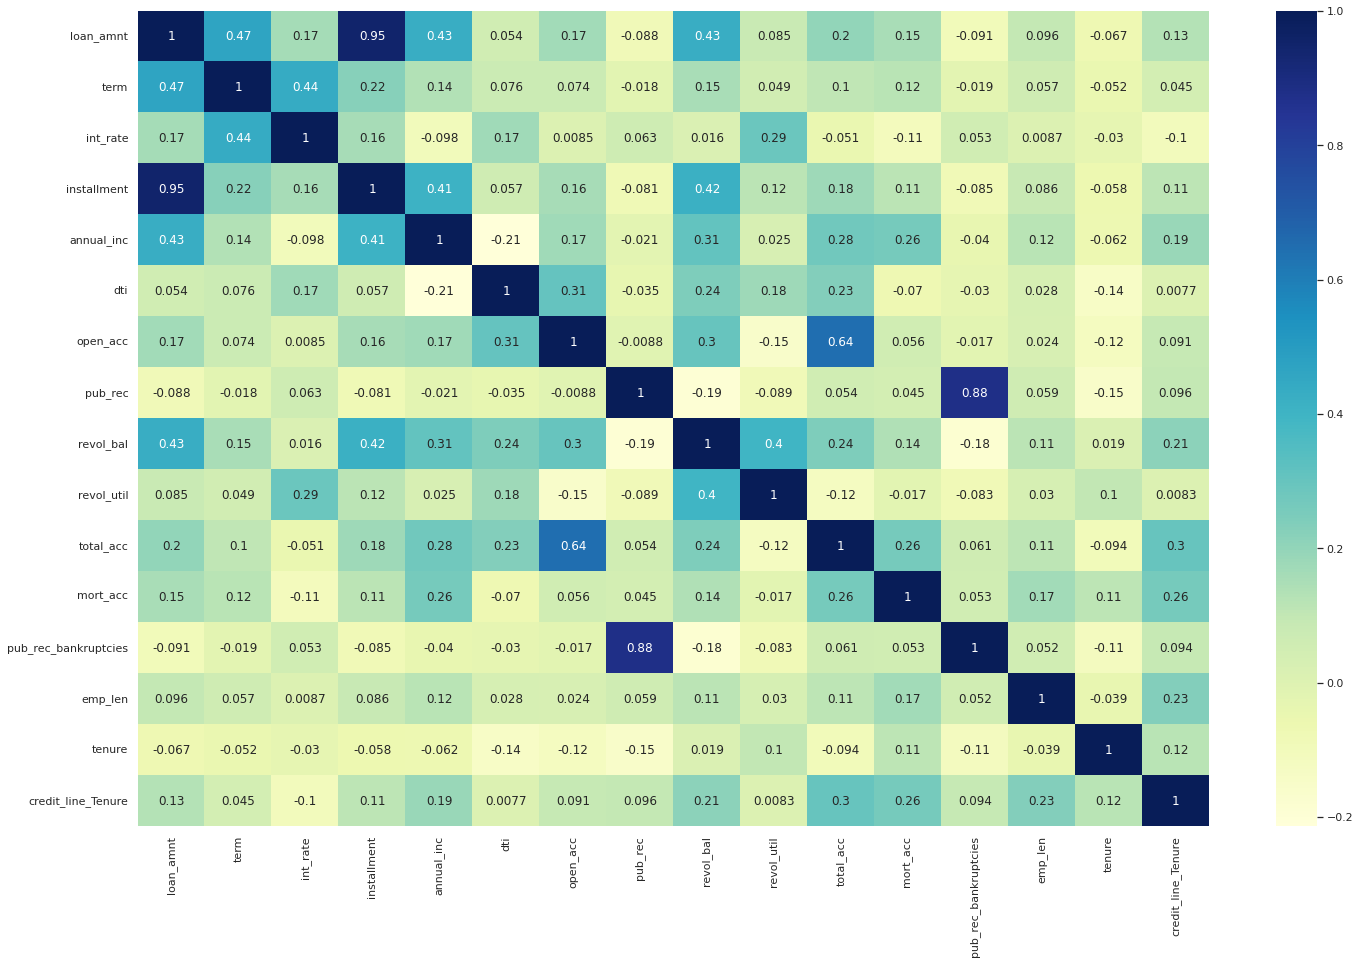

In [ ]:
# Correlation check
plt.figure(figsize=(24,15))
sns.heatmap(work_df.corr(),annot=True,cmap="YlGnBu")

plt.show()

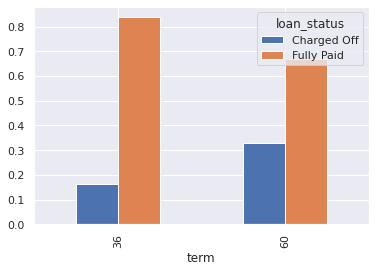

In [ ]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["term"], 
           normalize="index").plot(kind="bar")

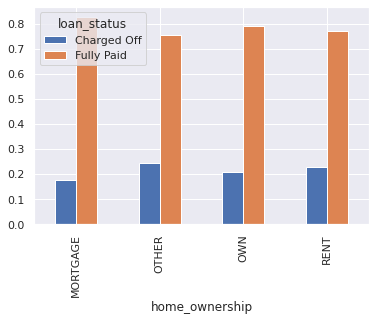

In [ ]:
pd.crosstab(columns = work_df["loan_status"],
           index=work_df["home_ownership"], 
           normalize="index").plot(kind="bar")

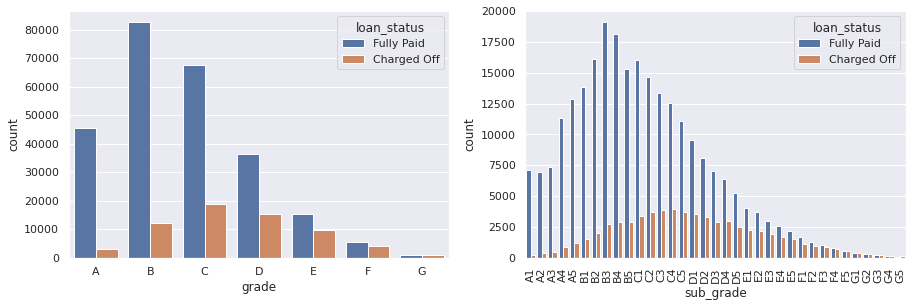

In [ ]:

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(work_df.grade.unique().tolist())
sns.countplot(x='grade', data=work_df, hue='loan_status', order=grade)
plt.subplot(2, 2, 2)
sub_grade = sorted(work_df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=work_df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

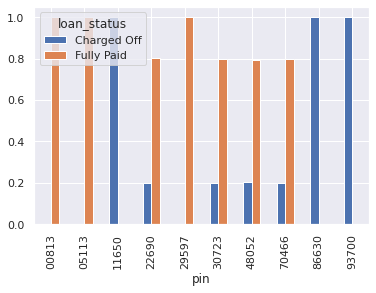

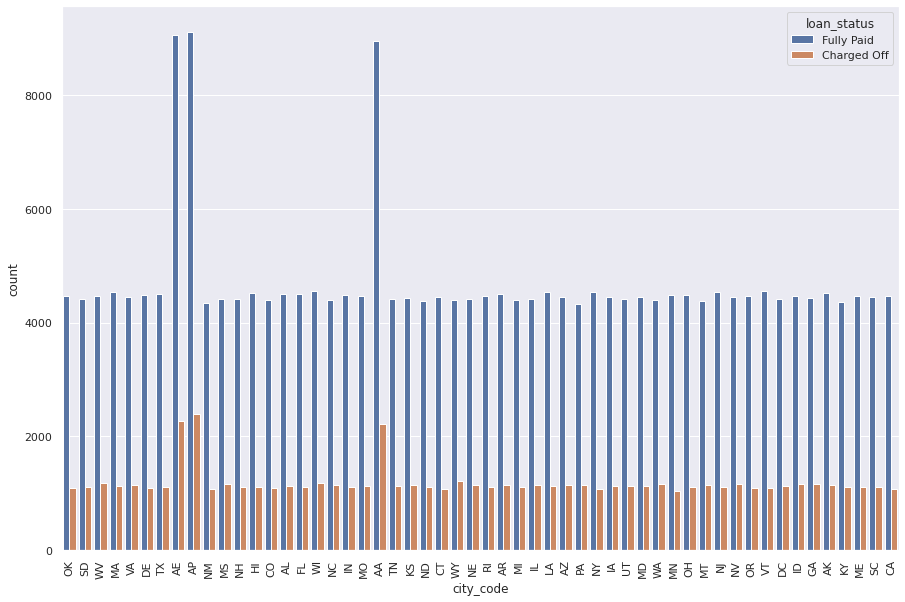

In [ ]:
    

pd.crosstab(columns = work_df["loan_status"],
           index=work_df["pin"], 
           normalize="index").plot(kind="bar")

plt.figure(figsize=(15, 10))
g = sns.countplot(x='city_code', data=work_df, hue='loan_status' )
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.show()

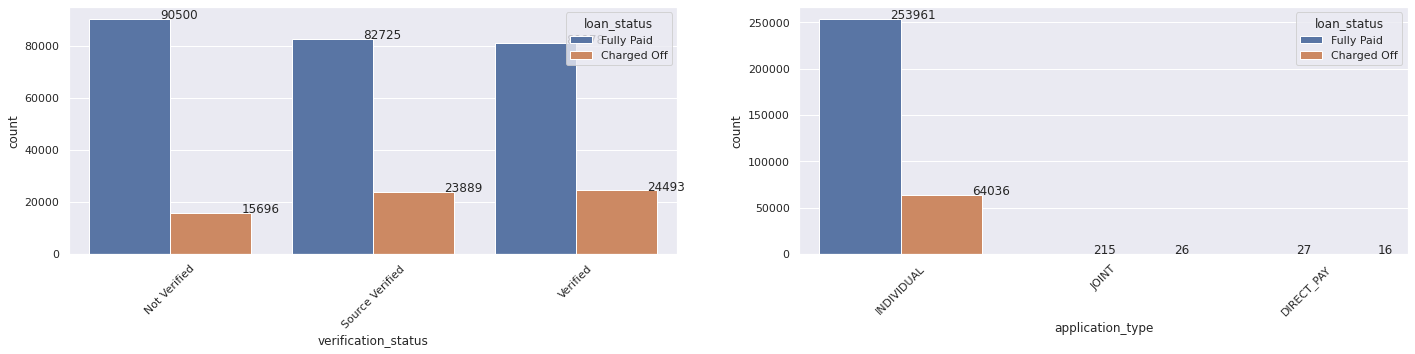

In [ ]:

plt.figure(figsize=(24, 10))
plt.subplot(2, 2, 1)

ax=sns.countplot(x='verification_status', data=work_df, hue='loan_status')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=45)
plt.subplot(2, 2, 2)
ax = sns.countplot(data=work_df, x='application_type',hue='loan_status')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+0.05))
  plt.xticks(rotation=45)
plt.show()

#### **Observation**: 
*   *Most of the patients are seem to be b/w the ages 28 to 52 and equally distributed b/w both the gender*
*   *Similarly irrespective of smoking habit, the patients seem to be highly distributed b/w 28 and 50 ages*
*   *Similar distribution observed across the regions*



In [ ]:

work_df[cat_cols].head(2)

term grade sub_grade home_ownership verification_status loan_status  \
0    36     B        B4           RENT        Not Verified  Fully Paid   
1    36     B        B5       MORTGAGE        Not Verified  Fully Paid   

              purpose  open_acc  pub_rec initial_list_status application_type  \
0            vacation      16.0        0                   w       INDIVIDUAL   
1  debt_consolidation      17.0        0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies issue_d_month issue_d_year  \
0         0                     0           Jan         2015   
1         1                     0           Jan         2015   

  earliest_cr_line_month earliest_cr_line_year    pin  emp_len  
0                    Jun                  1990  22690       10  
1                    Jul                  2004  05113        4

In [ ]:
work_df.nunique()

loan_amnt                   1341
term                           2
int_rate                     404
installment                48673
grade                          7
sub_grade                     35
emp_title                 144616
home_ownership                 4
annual_inc                 21956
verification_status            3
loan_status                    2
purpose                       14
title                      37906
dti                         4007
open_acc                      45
pub_rec                        2
revol_bal                  35317
revol_util                  1184
total_acc                     53
initial_list_status            2
application_type               3
mort_acc                       2
pub_rec_bankruptcies           2
issue_d_month                 12
issue_d_year                   7
earliest_cr_line_month        12
earliest_cr_line_year         31
pin                           10
city_code                     54
emp_len                       11
tenure    

In [ ]:
work_df[cat_features].head(2)

grade sub_grade        emp_title home_ownership verification_status  \
0     B        B4        Marketing           RENT        Not Verified   
1     B        B5  Credit analyst        MORTGAGE        Not Verified   

  loan_status             purpose               title initial_list_status  \
0  Fully Paid            vacation            Vacation                   w   
1  Fully Paid  debt_consolidation  Debt consolidation                   f   

  application_type issue_d_month issue_d_year earliest_cr_line_month  \
0       INDIVIDUAL           Jan         2015                    Jun   
1       INDIVIDUAL           Jan         2015                    Jul   

  earliest_cr_line_year                                   street    pin  
0                  1990     0174 Michelle Gateway\r\nMendozaberg  22690  
1                  2004  1076 Carney Fort Apt. 347\r\nLoganmouth  05113

In [ ]:
label_encoder = LabelEncoder()
# Encode labels in column 'Country'.
work_df['grade']= label_encoder.fit_transform(work_df['grade'])
work_df['sub_grade']= label_encoder.fit_transform(work_df['sub_grade'])
work_df['home_ownership']= label_encoder.fit_transform(work_df['home_ownership'])

work_df['verification_status']= label_encoder.fit_transform(work_df['verification_status'])
work_df['purpose']= label_encoder.fit_transform(work_df['purpose'])
work_df['initial_list_status']= label_encoder.fit_transform(work_df['initial_list_status'])

work_df['application_type']= label_encoder.fit_transform(work_df['application_type'])
work_df['issue_d_month']= label_encoder.fit_transform(work_df['issue_d_month'])
work_df['earliest_cr_line_month']= label_encoder.fit_transform(work_df['earliest_cr_line_month'])

work_df['city_code']= label_encoder.fit_transform(work_df['city_code'])

In [ ]:

work_df['emp_title']= label_encoder.fit_transform(work_df['emp_title'])

work_df['loan_status']= label_encoder.fit_transform(work_df['loan_status'])

In [ ]:
work_df[cat_features].head(2)

grade  sub_grade  emp_title  home_ownership  verification_status  \
0      1          8      67370               3                    0   
1      1          9      27888               0                    0   

   loan_status  purpose               title  initial_list_status  \
0            1       12            Vacation                    1   
1            1        2  Debt consolidation                    0   

   application_type  issue_d_month issue_d_year  earliest_cr_line_month  \
0                 1              4         2015                       6   
1                 1              4         2015                       5   

  earliest_cr_line_year    pin  city_code  
0                  1990  22690         39  
1                  2004  05113         44

In [ ]:
ob_to_Int=['term','mort_acc','pub_rec_bankruptcies','issue_d_year','earliest_cr_line_year','pin','emp_len']
work_df['term'].astype(int)

work_df['mort_acc'].astype(int)
work_df['pub_rec_bankruptcies'].astype(int)
work_df['issue_d_year'].astype(int)
work_df['earliest_cr_line_year'].astype(int)
work_df['pin'].astype(int)

work_df['emp_len'].astype(int)

0         10
1          4
2          0
3          6
4          9
          ..
393459     4
393461     6
393462     5
393463    10
393464     3
Name: emp_len, Length: 318281, dtype: int64

In [ ]:
cat_features = [x for x in work_df.columns if work_df[x].dtype == 'object']
cat_features

['title', 'issue_d_year', 'earliest_cr_line_year', 'pin']

In [ ]:
work_df[['pin','city_code']].value_counts()

pin    city_code
70466  4            1725
22690  1            1694
       4            1675
48052  4            1637
30723  0            1626
                    ... 
86630  40            139
       47            136
93700  31            133
86630  22            132
11650  35            127
Length: 540, dtype: int64

In [ ]:
work_df=work_df.drop(['title'], axis=1)

In [ ]:
# Independnet features
X = work_df.drop(['loan_status'], axis=1)
# Dependent feature
Target = work_df['loan_status']
X.tail()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
393459     5000.0    36      9.16       159.38      1          6     109280   
393461    20000.0    36     13.98       683.36      2         10      31236   
393462    19075.0    60     18.25       486.98      3         17      39616   
393463    28000.0    36      7.90       876.13      0          3      93795   
393464    12250.0    36      7.62       381.73      0          2      35620   

        home_ownership  annual_inc  verification_status  purpose    dti  \
393459               3     38000.0                    1        4  12.82   
393461               2     79000.0                    2        2  16.65   
393462               0     99000.0                    0        2  19.17   
393463               0    120000.0                    2        2  12.27   
393464               3     25000.0                    1        1  29.88   

        open_acc  pub_rec  revol_bal  revol_util  total_acc  \
393459       7.0        0    16550.0        19.4        9.0   
393461       7.0        0    15400.0        93.3       20.0   
393462      12.0        1    13991.0        76.5       29.0   
393463      12.0        0     6853.0        25.1       26.0   
393464      14.0        0    19915.0        33.9       19.0   

        initial_list_status  application_type  mort_acc  pub_rec_bankruptcies  \
393459                    1                 1         1                     0   
393461                    1                 1         0                     0   
393462                    1                 1         1                     0   
393463                    0                 1         1                     0   
393464                    0                 1         0                     0   

        issue_d_month issue_d_year  earliest_cr_line_month  \
393459              3         2016                       9   
393461              4         2014                       5   
393462              3         2016                       9   
393463              5         2013                       2   
393464              6         2012                       0   

       earliest_cr_line_year    pin  city_code  emp_len  tenure  \
393459                  2000  30723         50        4    84.0   
393461                  1994  22690          5        6   109.0   
393462                  2007  05113         46        5    84.0   
393463                  1995  29597         41       10   115.0   
393464                  2003  86630          0        3   128.0   

        credit_line_Tenure  
393459               267.0  
393461               343.0  
393462               183.0  
393463               326.0  
393464               238.0

In [ ]:
scaler = StandardScaler()
std_data = scaler.fit_transform(X)
print(std_data)

[[-0.39577427 -0.55547675 -0.51384088 ...  1.13849385 -0.6540704
   1.56885144]
 [-0.67161013 -0.55547675 -0.38992253 ... -0.51519111 -0.6540704
  -0.82865501]
 [ 0.37656615 -0.55547675 -0.72788168 ... -1.61764775 -0.6540704
  -1.35355287]
 ...
 [ 0.85583097  1.80025537  1.02049367 ... -0.23957695 -1.49239291
  -1.39611216]
 [ 2.08674851 -0.55547675 -1.31142449 ...  1.13849385  0.50668386
   0.63254715]
 [-0.08545892 -0.55547675 -1.37451019 ... -0.79080527  1.34500637
  -0.61585858]]


In [ ]:
std_df = pd.DataFrame(std_data, columns=X.columns)
std_df.head()

loan_amnt      term  int_rate  installment     grade  sub_grade  emp_title  \
0  -0.395774 -0.555477 -0.513841    -0.305098 -0.631700  -0.480908  -0.232896   
1  -0.671610 -0.555477 -0.389923    -0.613138 -0.631700  -0.327802  -1.144892   
2   0.376566 -0.555477 -0.727882     0.551859 -0.631700  -0.634015   0.649117   
3  -0.781944 -0.555477 -1.629106    -0.830552 -1.389082  -1.552653  -1.252164   
4   1.586796  1.800255  0.799694     1.046074  0.125681   0.437729  -1.047599   

   home_ownership  annual_inc  verification_status   purpose       dti  \
0        1.050048    1.994162            -1.223461  3.863185  1.094980   
1       -1.039106    0.057822            -1.223461 -0.285511  0.573433   
2        1.050048   -0.759277             0.002793 -0.700380 -0.579197   
3        1.050048   -0.351789            -1.223461 -0.700380 -1.847588   
4       -1.039106   -0.314551             1.229047 -0.700380  2.054675   

   open_acc   pub_rec  revol_bal  revol_util  total_acc  initial_list_status  \
0  1.101238 -0.428559   2.990419   -0.481374   0.105213             1.225398   
1  1.314827 -0.428559   1.004707   -0.004882   0.296275            -0.816062   
2  0.460468 -0.428559   0.008795    1.606903   0.200744            -0.816062   
3 -1.034660 -0.428559  -0.787911   -1.322485  -1.041155            -0.816062   
4  0.460468 -0.428559   1.549256    0.678780   1.824766            -0.816062   

   application_type  mort_acc  pub_rec_bankruptcies  issue_d_month  \
0          -0.02083 -1.229491             -0.375849      -0.463583   
1          -0.02083  0.813345             -0.375849      -0.463583   
2          -0.02083 -1.229491             -0.375849      -0.463583   
3          -0.02083 -1.229491             -0.375849       0.988754   
4          -0.02083  0.813345             -0.375849      -1.625452   

   issue_d_year  earliest_cr_line_month  earliest_cr_line_year       pin  \
0      0.987999                0.095018              -1.557264 -0.446624   
1      0.987999               -0.188241               0.825182 -1.131136   
2      0.987999               -1.321276               1.335706 -1.131136   
3      0.234632                1.511311               1.165531 -1.298594   
4     -0.518735                0.378277              -0.025692 -0.876562   

   city_code   emp_len    tenure  credit_line_Tenure  
0   0.855364  1.138494 -0.654070            1.568851  
1   1.164225 -0.515191 -0.654070           -0.828655  
2   1.658403 -1.617648 -0.654070           -1.353553  
3  -0.194764  0.036037 -0.525098           -1.197502  
4   1.411314  0.862880  0.700143            0.079276

In [ ]:
import statsmodels.api as sm
xt = sm.add_constant(X)
#model = sm.OLS(Target, xt).fit()
#fit regression model
model = sm.OLS(Target, xt.astype(float)).fit()

#view summary of model fit
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     2580.
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:30:12   Log-Likelihood:            -1.2612e+05
No. Observations:              318281   AIC:                         2.523e+05
Df Residuals:                  318250   BIC:                         2.526e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     55

In [ ]:
# Get the Train-Test split
from sklearn.model_selection import train_test_split
     
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, Target, test_size=0.2, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=4)
X_train.shape

(190968, 30)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # C = 1, lambda = 1
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.coef_

array([[-1.01592531e-04, -5.25057958e-03, -4.73766230e-03,
         1.71001508e-03, -1.48316555e-03, -7.45861166e-03,
        -1.79482140e-06, -4.16440867e-04,  1.23039886e-05,
        -2.24711973e-04, -4.61862597e-04, -4.02773431e-03,
        -1.04842832e-03, -4.75960743e-05,  1.36972129e-05,
        -9.30580002e-03, -1.67931257e-04, -3.01036600e-06,
         2.60783121e-06,  1.33726812e-04, -2.42888660e-05,
         4.15607279e-05,  6.06692938e-04,  3.76656414e-05,
         8.23231529e-04, -3.42771240e-05, -1.84676377e-04,
         5.69579292e-05,  4.03176195e-03,  1.66598899e-03]])

In [ ]:
model.intercept_

array([4.80354591e-07])

In [ ]:
print(f'Train Accuracy:{model.score(X_train,y_train)}, Val Accuracy:{model.score(X_val,y_val) }' ) 

Train Accuracy:0.8361296133383603, Val Accuracy:0.8345639059947216


In [ ]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 12000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline( scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = scaled_lr.score(X_train, y_train)
  val_score = scaled_lr.score(X_val, y_val)
  train_scores.append(train_score)
  val_scores.append(val_score)

In [ ]:
len(val_scores)

120

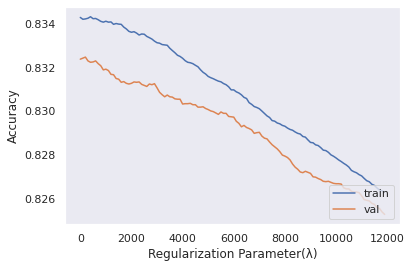

In [ ]:
plt.figure()
plt.plot(list(np.arange(0.01, 12000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 12000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
np.argmax(val_scores)

2

In [ ]:
val_scores[23]

0.8313277617192409

In [ ]:
test_score = scaled_lr.score(X_test,y_test)
print(test_score)

0.8285655937288908


In [ ]:
y_pred = scaled_lr.predict(X_test)

In [ ]:
variable = "viral load"
for i in cat_features:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data=work_df, dodge=False)
 plt.title(variable + " Distribution w.r.to " + i)
 plt.show()

In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

#### **Observation**: 
*   *Female patients seems to be little more vulnerable to viral load than Male patients*
*   *Incidently non-smokers tend to have high viral load than smokers*
*   *Amongst the regions, Southeast is impacted with high viral load than other regions*



In [ ]:
# Impact of Severity Level on Hospitalization Charges
plt.figure(figsize = (7,5))
sns.boxplot(x='severity level', y='hospitalization charges', data=work_df, dodge=False)
plt.title(variable + "Severity level Vs hospitalization charges")
plt.show()

#### **Observation**: 
*   *Severity Levels 0, 3 and 4 seem to have higher hospitalization charges*



In [ ]:
variable = "hospitalization charges"
for i in cat_features:
 plt.figure(figsize = (7,5))
 sns.boxplot(x=i, hue=i, y=variable, data=work_df, dodge=False)
 plt.title(variable + " Distribution w.r.to " + i)
 plt.show()

#### **Observation**: In terms of hospitalization charges, 
*   *Male patients tend to incur high charges*
*   *Evidently Smokers are paying more than the non-smokers*
*   *Southeast region has higher hospitalization charges amongst regions*



In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle("Hospitalization Charges Analysis", fontsize = 15)
g1 = sns.histplot(work_df['hospitalization charges'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20) 
g1.axvline(work_df['hospitalization charges'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean") 
g1.axvline(work_df['hospitalization charges'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median') 
g1.axvline(work_df['hospitalization charges'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode') 
g1.legend()
stats.probplot(work_df['hospitalization charges'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6), squeeze=False)
plt.suptitle("Viral Load Analysis", fontsize = 15)
g1 = sns.histplot(work_df['viral load'], kde = True, edgecolor='green', ax = axs[0, 0], bins = 20) 
g1.axvline(work_df['viral load'].mean(), ls = '--', color = "red", lw = 2.5, label = "mean") 
g1.axvline(work_df['viral load'].median(), ls = '--' ,color = 'blue', lw = 2.5, label = 'Median') 
g1.axvline(work_df['viral load'].mode()[0], ls = '--', color = 'green', lw = 2.5, label = 'Mode') 
g1.legend()
stats.probplot(work_df['viral load'], dist="norm", plot=axs[0, 1])
plt.tight_layout()
plt.show()

In [ ]:
# Check for Correlation
plt.figure(figsize=(15,8))
sns.heatmap(work_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### **Observation**: *Notably, there is a high correlatioin b/w Age & Hospitalization Charges*

In [ ]:
work_df['age_bins'] = pd.cut(x=work_df['age'], bins = [0, 18, 35, 50, 70, 100], labels = ['0-18', '18-35', '35-50', '50-70', '70-100'])
work_df.head()

In [ ]:
sns.lineplot(x='age', y='hospitalization charges', data=work_df, hue='sex')

In [ ]:
sns.barplot(x='age_bins', y='hospitalization charges', data=work_df, hue='sex')

#### **Observation**: *It is evident from the above graphs that hospitalization charges increase with the age and that too in women segment*

In [ ]:
work_df.groupby(['region', 'sex', 'smoker']).mean()['hospitalization charges'].unstack()

In [ ]:
# Hospitalization charges max by region by sex and by smoking habit
hosp_charge_max_by_region = work_df.groupby(['region', 'sex', 'smoker']).max()['hospitalization charges'].sort_values().unstack()
hosp_charge_max_by_region

In [ ]:
# Hospitalization charges min by region by sex and by smoking habit
hosp_charge_min_by_region = work_df.groupby(['region', 'sex', 'smoker']).min()['hospitalization charges'].sort_values().unstack()
hosp_charge_min_by_region

### Hypothesis Testing

#### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

In [ ]:
# Hypothesis 1 - Hospitalization of people who are smokers is greater than the non-smokers
work_df.groupby('smoker')['hospitalization charges'].describe()

##### 

Null Hypothesis :  Mean Hospitalization charges of Smokers (m1) <= the Mean Hospitalization charges of nonsmokers (m2)

Alternate Hypothesis: m1 > m2 (The average hospitalization charges of smokers is greater than that of nonsmokers)

Decide the significance level. If P values is less than alpha, then 'fail to accept' the null hypothesis.

Let's do a T-stat test. The > sign in alternate hypothesis indicate test is right tailed, which means all z values that would reject null hypothesis are in just one tail to the right of sampling distribution curve.

In [ ]:
# Mean value of Smokers and their hospitalization charges from a random sample
smoker_sample = df[df['smoker']=='yes']['hospitalization charges'].sample(200)
m1 = smoker_sample.mean()
m1

In [ ]:
# Mean value of Non-smokers and their hospitalization charges from a random sample
non_smoker_sample = df[df['smoker']=='no']['hospitalization charges'].sample(200)
m2 = non_smoker_sample.mean()
m2

In [ ]:
# If mean1 is > mean2 then alternate value is 'greater' else it is 'less' else if mean1 equal to mean2 then the value is 'two-sided'
alpha = 0.05
alt_val = ["greater" if m1>m2 else 'two-sided' if m1==m2 else "less"]
t_stat, p_val = stats.ttest_ind(smoker_sample, non_smoker_sample, equal_var=False, alternative=alt_val[0])
print("Test Statistic = {}, P-Value = {}, One Tail P-Value = {}".format(t_stat, p_val, p_val_onetail))
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

In [ ]:
sns.distplot(smoker_sample, color='green')
sns.distplot(non_smoker_sample, color='red')

#### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

##### 

Null Hypothesis : the viral load of females is different from that of males

Alternate Hypothesis: the viral load of females is not different from that of males

Decide the significance level. If P values is less than alpha, then 'fail to accept' the null hypothesis.

In [ ]:
work_df.groupby('sex')['viral load'].describe()

In [ ]:
male_sample = work_df[work_df['sex']=='male']['viral load'].sample(500)
male_mean = male_sample.mean()
male_mean

In [ ]:
female_sample = work_df[work_df['sex']=='female']['viral load'].sample(500)
fem_mean = female_sample.mean()
fem_mean

In [ ]:
# As the means of both the samples of male and female, let's do 'two-sided'.
alpha = 0.05
t_stat, p_val = stats.ttest_ind(male_sample, female_sample)
print("Test Statistic = {}, P-Value = {}".format(t_stat, p_val))
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

In [ ]:
sns.distplot(male_sample, color='green')
sns.distplot(female_sample, color='red')

#### **Observation**: *We fail to reject the Null hypothesis, which means gender doesn't have much effect on Viral load*

### Chi-Squared Test

#### Is the proportion of smoking significantly different across different regions? (Chi-square)

Both Smoker and Region are categorical variables

#####

Null Hypothesis : Smokers proportions is same across all regions

Alternate Hypothesis: Smokers proportions is different across different regions

If P values is less than alpha, then 'fail to accept' the null hypothesis.

In [ ]:
contingency = pd.crosstab(work_df.region, work_df.smoker)
contingency

In [ ]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction=False)
print("Chi Square Statistic: {}, P-Value: {}, Degree of Freedom: {}, Expected Frequency: {}".format(chi2, p_val, dof, exp_freq))
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

### ANOVA Test

#### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

#####

Null Hypothesis : The mean viral load of women with no severity level μ1, one severity level μ2 and two severity level μ3 are the same.  

Alternate Hypothesis: μ1 or μ2 or μ3 may not be same.

If P values is less than alpha, then 'fail to accept' the null hypothesis.

In [ ]:
work_df[work_df['sex']=='female'].groupby('severity level')['viral load'].describe().head()

In [ ]:
# female_severity_df = work_df[work_df['sex']=='female'].loc[work_df[work_df['sex']=='female']['severity level']<=2]
female_severity_df = work_df[work_df['sex']=='female'].loc[work_df[work_df['sex']=='female']['severity level']<=2]
female_severity_df.head()

In [ ]:
# Shapiro-Wilk’s test - Let's test null hypothesis: viral load follows normal distribution against the alternative hypothesis: viral load doesn't follow normal distribution
w, p_val = shapiro(female_severity_df['viral load'])
print("P-Value is: ", p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

#### **Observation**: *Null hypothesis fails, which means it doesn't follow normal distribution. This can be validated by EDA as follows*

In [ ]:
sns.distplot(female_severity_df['viral load'], bins=20)

In [ ]:
sns.distplot(np.log(female_severity_df['viral load']), bins=30)

In [ ]:
# For the same above Ho and H1, let's do a log normal test and check the p-value. 
w, p_val = shapiro(np.log(female_severity_df['viral load']))
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

#### **Observation**: *Even the log normal test fails the Ho, which means the distribution is not normal*

In [ ]:
transformed_data, best_lambda = stats.boxcox(work_df['viral load']) 
sns.distplot(transformed_data, hist=False, kde=True, label = "TransformedData") 
sns.distplot(work_df['viral load'], hist=False, kde=True, label = "Non Transformed Data") 
plt.legend()
plt.show()

In [ ]:
tstat, p_val = stats.shapiro(transformed_data)
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

#### **Observation**: *Boxcox transformation technique for viral load indicates p-value > alpha. So distribution is Normal on transformed data*

#### Levene’s test

Null hypothesis : All the viral load variances are equal

Alternative hypothesis : At least one variance is different from the rest.

In [ ]:
# Levene's test
statistics, p_val = levene(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100), 
                           female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                           female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

In [ ]:
test_stat, p_val = f_oneway(female_severity_df[female_severity_df['severity level']==0]['viral load'].sample(100), 
                            female_severity_df[female_severity_df['severity level']==1]['viral load'].sample(100),
                            female_severity_df[female_severity_df['severity level']==2]['viral load'].sample(100, replace=True))
print('P-Value is: ', p_val)
if p_val > alpha:
  print("We fail to reject the null hypothesis")
else:
  print("We fail to accept the null hypothesis")

#### **Observation**: *P-Value is high, thus Null Hypothesis is true, indicating Means are equal for all severity levels.*

# Observations & Insights



*   There is no missing or duplicate value in the given dataset
*   Age 18 & 19 have more patients and the rest of the ages have equal distribution
*   Interestingly Non-Smoker patients count is more than the Smokers count
*   Southeast region has more patients and the rest of the regions have equal distribution
*   Good to see less number of patients with 'Severity Level' high
*   There are outliers in 'viral load' and 'hospitalization charges' columns
*   There is a high correlatioin b/w Age & Hospitalization Charges. As the age increases, hospitalization charges also increases
*   Also, hospitalization seem to increase with the age, and more specifically for women   
*   Female patients seems to be little more vulnerable to viral load than Male patients
*   Incidently non-smokers tend to have high viral load than smokers
*   Amongst regions, Southeast is impacted high viral load than other regions
*   Male patients tend to incur high charges
*   Evidently Smokers are paying more than the non-smokers
*   Southeast region has higher hospitalization charges amongst regions
*   Hospitalization charges increase with age and that too in women segment

**Observations from Hypothesis Testing:**

*   Hospitalization Charges for smokers is higher than for non-smokers
*   Viral Load in Females is more compared to Males
*   Proportion of smoking is almost similar across the regions
*   Viral Load of women with Severity levels - 0,1,2 are more or less same




# Recommendations

Based on the above observations and insights, some of the recommendations to consider are: 
*   It is alarming to see high number of patients at lower age group 18-20. It's high time to role out stable nutrition programs for children & teens.
*   Notably Southeast region is impacted with high viral load and increased hospitalization charges. Special attention needs to be given in this region
*   As age has direct proportion to the increased hospitalization charges, Apollo can come up with targeted healthcare policy & programs for higher age groups
*   Female gender group requires specific, focused attention 
*   Special medi-claim policy can be launced for Smokers 

In [ ]:
from sklearn.linear_model import LogisticRegression

# X is the feature data, with 1 indicating black jacket and 0 indicating other color
X = np.array([[1]*80 + [0]*420]).reshape(-1, 1)

# y is the target data, with 1 indicating a tip and 0 indicating no tip
y = np.array([1]*40 + [0]*40 + [1]*300 + [0]*120)

# Fit the logistic regression model
clf = LogisticRegression().fit(X, y)

# Compute the equation for computing the log-odds of giving a tip based on the color of the server’s jacket
intercept = clf.intercept_[0]
coefficient = clf.coef_[0][0]

log_odds = intercept + coefficient * X
print(f"{intercept}+{coefficient}x")

0.9062445135067347+-0.8630863675375628x
